<a href="https://colab.research.google.com/github/riyachandaria/BSc-Data-Science-Project/blob/main/Code/Code%20-%20master%20copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing modules and packages**

In [1]:
# Installing a version of scikit-Learn which works with my models later on
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.1.3
import sklearn
print(sklearn.__version__)

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 12.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.1.3 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
bigframes 1.36.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.
1.1.3


In [2]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
!pip install -q geopandas
import geopandas as gpd
from IPython.display import display
import numpy as np
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.arima.model import ARIMA
import textwrap
from tabulate import tabulate
from pandas.plotting import table
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
import shap
import folium
from folium.plugins import MarkerCluster

# **Loading and accessing data**

In [3]:
# Accessing data file
file_path = 'https://raw.githubusercontent.com/riyachandaria/BSc-Data-Science-Project/refs/heads/main/Data%20Files/owid-co2-data.csv'  # dataset dowloaded on 14th Nov 2024
df = pd.read_csv(file_path)

In [4]:
df.head(10)

country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   
5  Afghanistan  1855      AFG   3835192.0  NaN         NaN   
6  Afghanistan  1856      AFG   3852417.0  NaN         NaN   
7  Afghanistan  1857      AFG   3869714.0  NaN         NaN   
8  Afghanistan  1858      AFG   3887081.0  NaN         NaN   
9  Afghanistan  1859      AFG   3904521.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   
5                    NaN  NaN             NaN              NaN  ...   
6                    NaN  NaN             NaN              NaN  ...   
7                    NaN  NaN             NaN              NaN  ...   
8                    NaN  NaN             NaN              NaN  ...   
9                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                 0.157   
2                     NaN                                 0.156   
3                     NaN                                 0.156   
4                     NaN                                 0.155   
5                     NaN                                 0.155   
6                     NaN                                 0.154   
7                     NaN                                 0.154   
8                     NaN                                 0.154   
9                     NaN                                 0.154   

   temperature_change_from_ch4  temperature_change_from_co2  \
0                          NaN                          NaN   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   
5                          0.0                          0.0   
6                          0.0                          0.0   
7                          0.0                          0.0   
8                          0.0                          0.0   
9                          0.0                          0.0   

   temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
0                          NaN                          NaN        NaN   
1                          0.0                          0.0        NaN   
2                          0.0                          0.0        NaN   
3                          0.0                          0.0        NaN   
4                          0.0                          0.0        NaN   
5                          0.0                          0.0        NaN   
6                          0.0                          0.0        NaN   
7                          0.0                          0.0        NaN   
8                          0.0                          0.0        NaN   
9                          0.0                          0.0        NaN   

   total_ghg_excluding_lucf  trade_co2  trade_co2_share  
0                       NaN        NaN              NaN  
1                       NaN        NaN              NaN  
2                       NaN        NaN              NaN  
3                       NaN        NaN              NaN  
4    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47415 entries, 0 to 47414
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    47415 non-null  object 
 1   year                                       47415 non-null  int64  
 2   iso_code                                   39548 non-null  object 
 3   population                                 39414 non-null  float64
 4   gdp                                        15211 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            24684 non-null  float64
 10  co2_including_luc     

# **Data Cleaning/Preprocessing**

In [6]:
# Function to selected desired columns and remove any NaNs
def cleaning_data(df):

  # Keep only the columns specified by index
  small_df = df.iloc[:, list(range(0,10)) + [16, 17, 19, 20] + list(range(33,39)) + list(range(40,51)) + [75, 77]]

  # Removing any NaNs
  cleaned_df = small_df.dropna()

  # Ensure the year column is numeric (in case it's not already)
  cleaned_df.loc[:, 'year'] = pd.to_numeric(cleaned_df['year'], errors='coerce')

  # Return the cleaned dataframe
  return cleaned_df

cleaned_df = cleaning_data(df)

# **Exploratory Data Analysis**

## **1. Overview of Data**

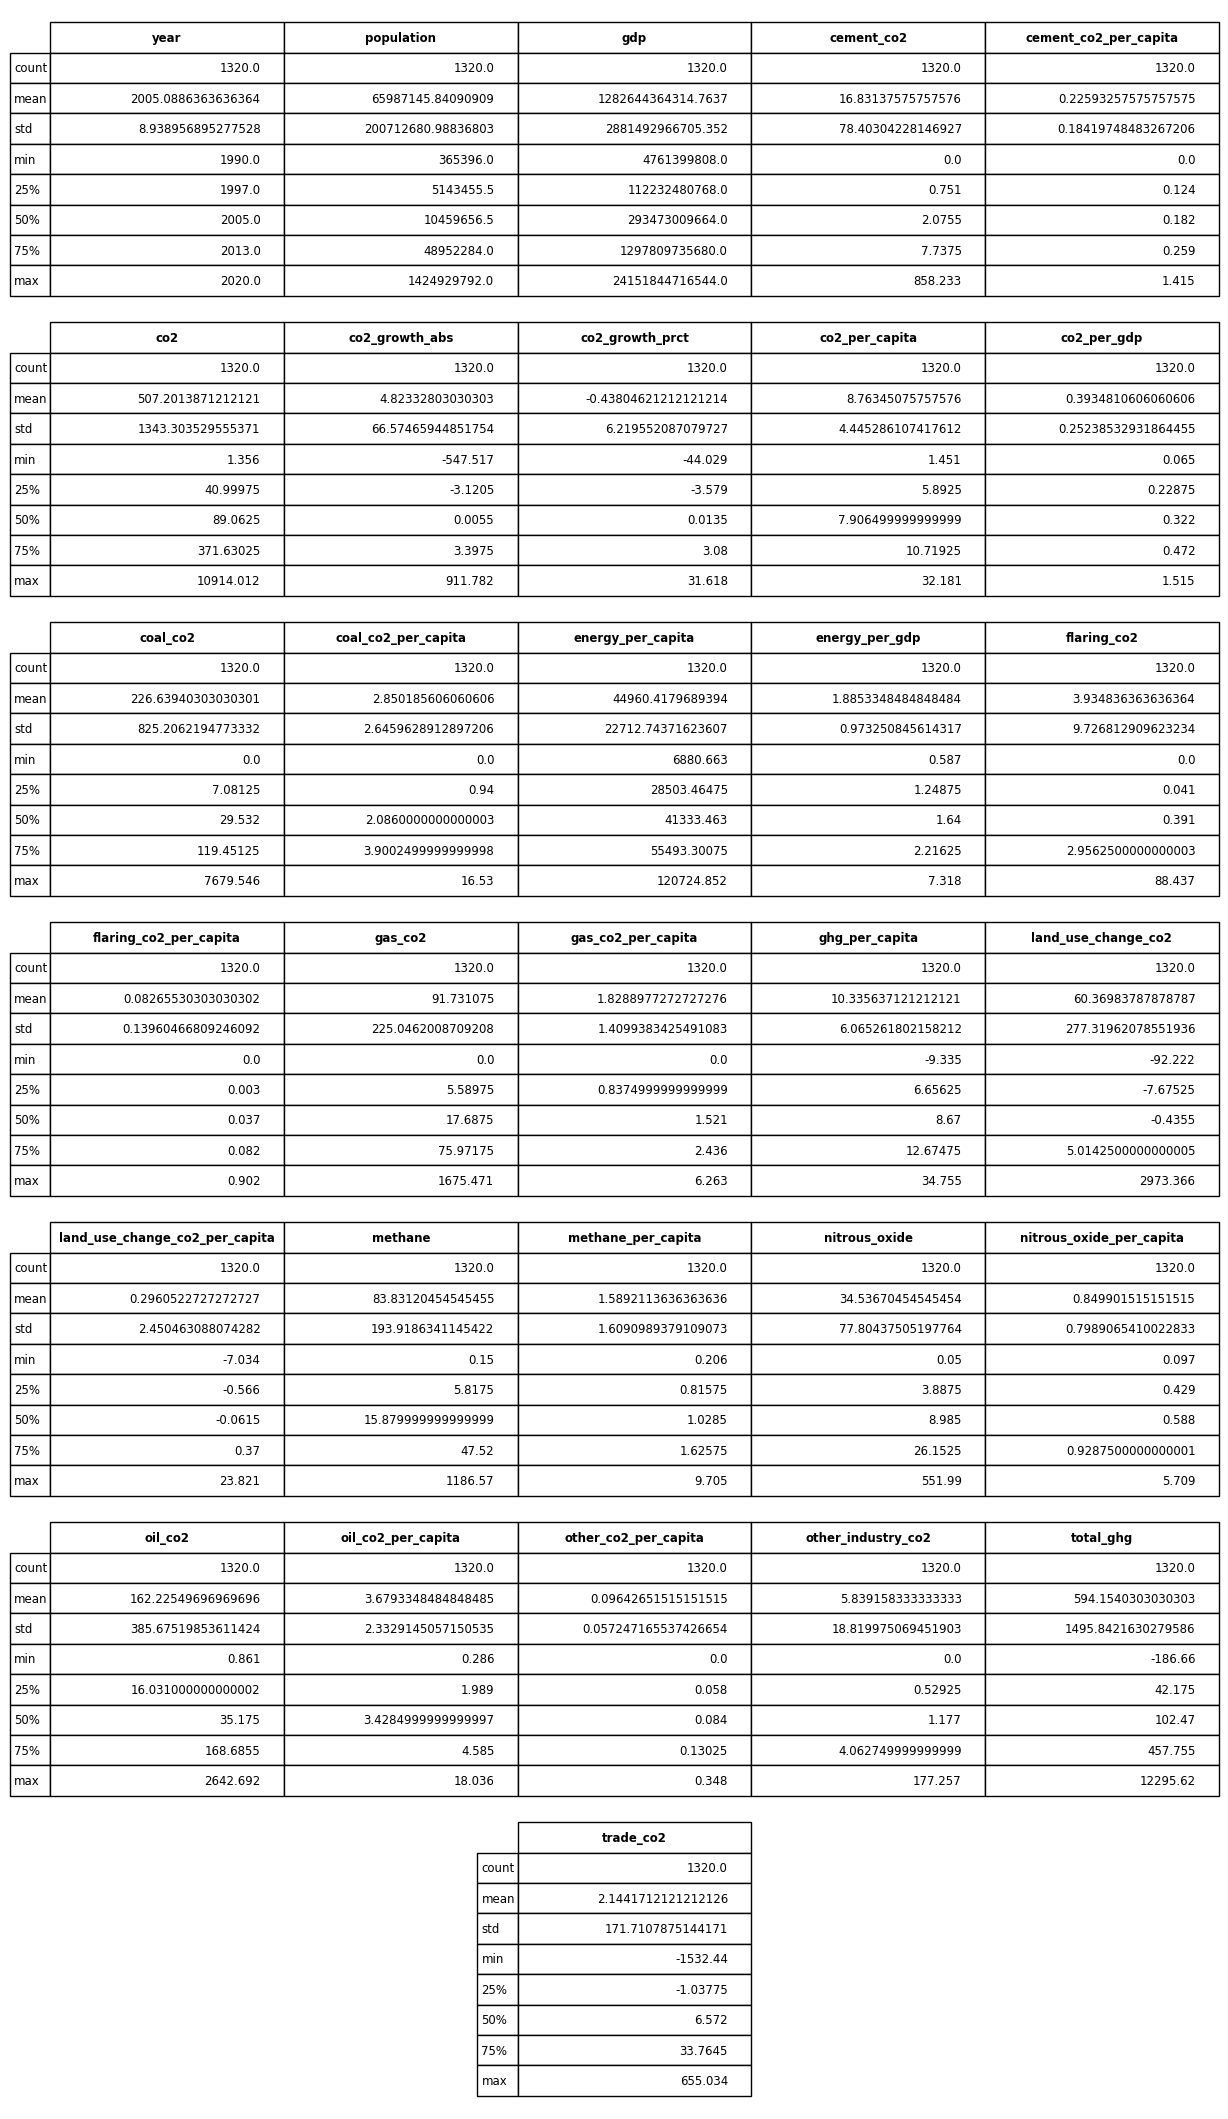

In [7]:
# print(cleaned_df.describe())
description = cleaned_df.describe()

# Split the table into chunks based on columns
max_columns_per_table = 5 # Adjust the number of columns per table
num_tables = (description.shape[1] // max_columns_per_table) + 1

# Create a figure for displaying multiple parts
fig, axs = plt.subplots(num_tables, 1, figsize=(12, num_tables * 3))

# Loop through the tables and plot them one by one
for i in range(num_tables):
    start_col = i * max_columns_per_table
    end_col = (i + 1) * max_columns_per_table
    chunk = description.iloc[:, start_col:end_col]
    ax = axs[i]
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    # Remove the spines (lines) around the plot
    for spine in ax.spines.values():
        spine.set_visible(False)
    # Create the table for each chunk
    tab = table(ax, chunk, loc='center', colWidths=[0.2] * len(chunk.columns))
    # Adjust the font size to fit the table
    tab.auto_set_font_size(False)
    tab.set_fontsize(8.5)
    tab.scale(1.2, 1.2)
    # Wrap only the header text and make it bold
    for (i, j) in tab.get_celld():
        cell = tab.get_celld()[(i, j)]
        if i == 0: # Header row
            # Access the Text object of the header cell
            text = cell.get_text()
            # Make the header bold
            text.set_fontweight('bold')
            # Manually insert line breaks into the header label to wrap text
            new_text = text.get_text().replace(' ', '\n')
            text.set_text(new_text)
plt.tight_layout(pad=0.0)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [8]:
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 3409 to 45133
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         1320 non-null   object 
 1   year                            1320 non-null   int64  
 2   iso_code                        1320 non-null   object 
 3   population                      1320 non-null   float64
 4   gdp                             1320 non-null   float64
 5   cement_co2                      1320 non-null   float64
 6   cement_co2_per_capita           1320 non-null   float64
 7   co2                             1320 non-null   float64
 8   co2_growth_abs                  1320 non-null   float64
 9   co2_growth_prct                 1320 non-null   float64
 10  co2_per_capita                  1320 non-null   float64
 11  co2_per_gdp                     1320 non-null   float64
 12  coal_co2                        132

## **2a. Countries present in the dataset**

In [9]:
# Get unique country names
unique_countries = cleaned_df['country'].unique()

# Convert to DataFrame
country_df = pd.DataFrame(unique_countries, columns=['Country Name'])

# Add an index starting from 1
country_df.index = range(1, len(country_df) + 1)

# Display as a formatted table
display(country_df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
))

## **2b. Ranking countries in order of `gdp_per_capita`**

In [10]:
# Creating a 'gdp_per_capita' column
cleaned_df['gdp_per_capita'] = cleaned_df['gdp'] / cleaned_df['population']

# Group by country_name and calculate the mean GDP, then sort in descending order
gdp_ranked = cleaned_df.groupby('country')['gdp_per_capita'].mean().sort_values(ascending=False).reset_index()

# Add an index starting from 1
gdp_ranked.index = range(1, len(gdp_ranked) + 1)

# Format the GDP column to be more readable
gdp_ranked['gdp_per_capita'] = gdp_ranked['gdp_per_capita'].apply(lambda x: f"{x:,.2f}")

# Display the country names with the new index
display(gdp_ranked[['country', 'gdp_per_capita']])

country gdp_per_capita
1           Norway      77,901.09
2       Luxembourg      49,962.03
3      Switzerland      49,477.48
4    United States      46,808.99
5          Ireland      42,009.83
6          Denmark      40,175.63
7        Australia      39,859.30
8      Netherlands      39,283.89
9           Canada      38,465.57
10          Sweden      37,070.99
11         Germany      36,727.97
12         Austria      36,688.86
13          France      35,423.12
14         Belgium      34,960.79
15           Japan      34,290.99
16         Finland      33,832.03
17  United Kingdom      33,277.17
18           Italy      32,429.49
19     New Zealand      29,746.86
20           Spain      28,217.01
21     South Korea      27,169.05
22        Slovenia      23,397.95
23        Portugal      23,060.91
24           Malta      21,827.85
25          Greece      21,748.53
26         Czechia      21,689.28
27          Cyprus      20,496.14
28         Estonia      20,212.80
29        Slovakia      18,166.45
30         Hungary      17,125.86
31          Poland      16,833.57
32          Russia      16,776.83
33          Latvia      16,272.86
34       Lithuania      16,104.31
35      Kazakhstan      15,865.35
36         Croatia      15,525.41
37          Turkey      15,466.65
38         Belarus      13,176.56
39         Romania      12,813.00
40        Bulgaria      11,915.93
41          Brazil      11,680.48
42         Ukraine       8,110.46
43           China       7,999.58

## **3a. Top 10 countries with the highest `gdp_per_capita` between 2015-2020**

In [11]:
# Filter data for the years 2015-2020
data_2015_2020 = cleaned_df[(cleaned_df['year'] >= 2015) & (cleaned_df['year'] <= 2020)]

# Calculate the average GDP for each country between 2015 and 2020
avg_gdp = data_2015_2020.groupby('country', as_index=False).agg({'gdp_per_capita': 'mean'})

# Get the top 10 countries with the highest average GDP
top_gdp_countries = avg_gdp.nlargest(10, 'gdp_per_capita')

# Reset index to start from 1
top_gdp_countries = top_gdp_countries.reset_index(drop=True)
top_gdp_countries.index = top_gdp_countries.index + 1

# Print top 10
display(top_gdp_countries[['country', 'gdp_per_capita']])

country  gdp_per_capita
1          Norway    84045.262175
2     Switzerland    61492.917052
3         Ireland    56277.030874
4      Luxembourg    54831.427314
5   United States    53646.742631
6       Australia    48619.293022
7         Denmark    47006.243195
8     Netherlands    46358.456116
9         Germany    45565.878835
10         Sweden    44470.281510

## **3b. CO2 emission per capita for the top 10 countries with the highest `gdp_per_capita` between 2015-2020**

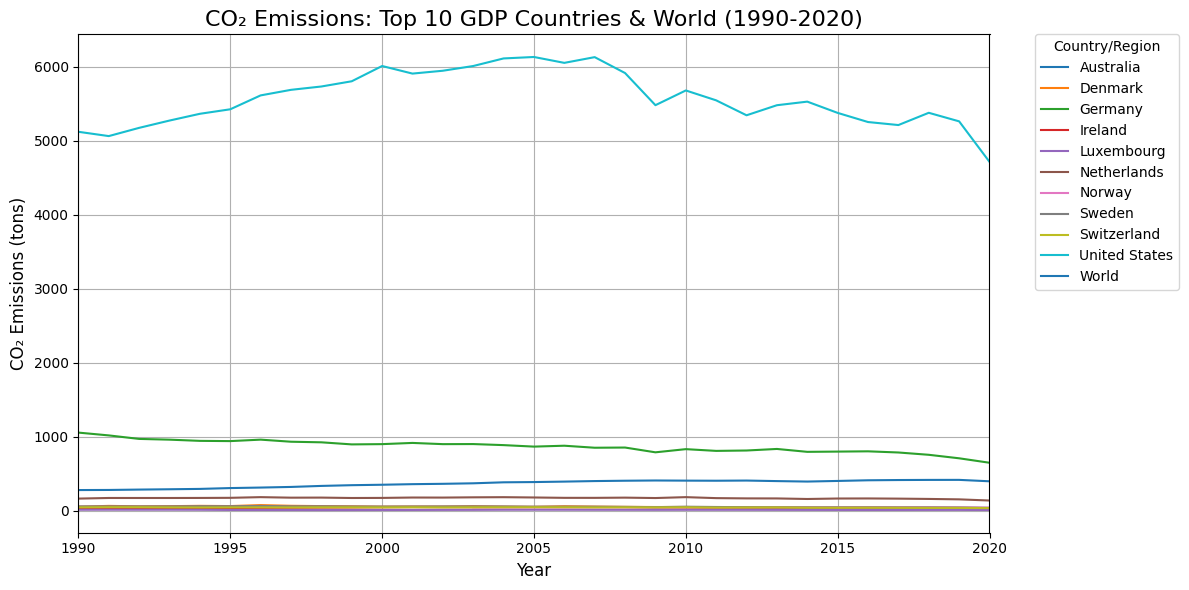

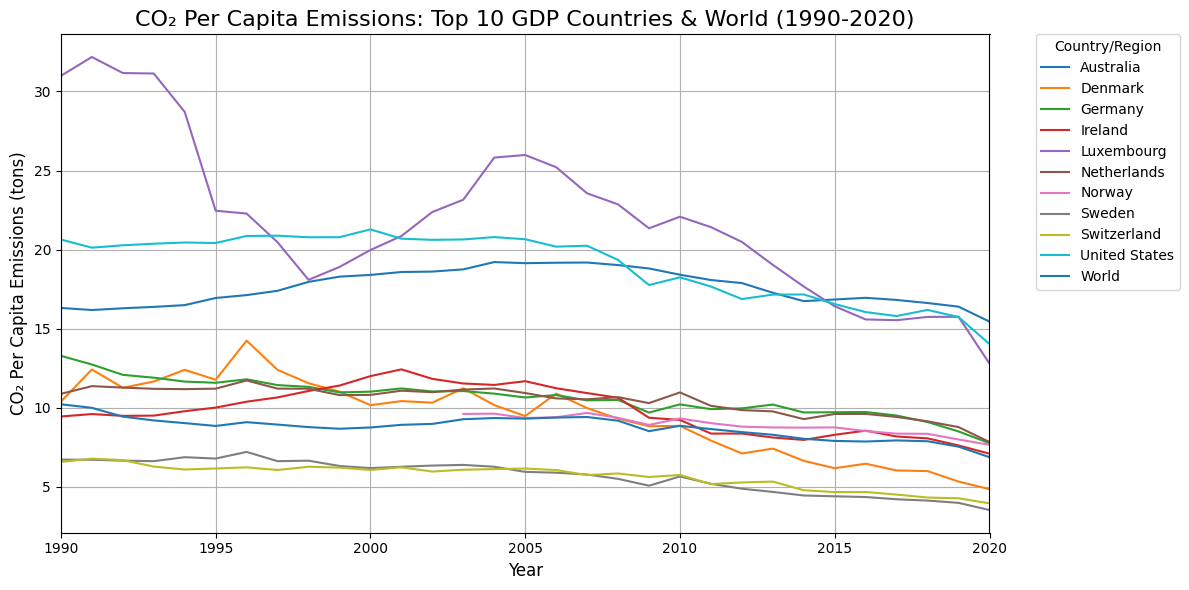

In [12]:
# Filter data for the years 2015-2020
data_2015_2020 = cleaned_df[(cleaned_df['year'] >= 2015) & (cleaned_df['year'] <= 2020)]

# Calculate the average GDP for each country between 2015 and 2020
avg_gdp = data_2015_2020.groupby('iso_code', as_index=False).agg({'gdp_per_capita': 'mean'})

# Get the top 10 countries with the highest average GDP
top_gdp_countries = avg_gdp.nlargest(10, 'gdp_per_capita')['iso_code'].tolist()

# Create a copy of the filtered data to avoid SettingWithCopyWarning
big_countries_data = cleaned_df[cleaned_df['iso_code'].isin(top_gdp_countries)].copy()

# Calculate the global average per capita CO2 emissions
global_avg = cleaned_df.groupby('year', as_index=False).agg({'co2_per_capita': 'mean'})
global_avg['iso_code'] = 'World'  # Add a label for the global average

# Combine big countries data with global average
combined_data = pd.concat([big_countries_data, global_avg], ignore_index=True)

# Mapping ISO codes to full country names (Update this as necessary if iso_code to country mapping is available)
data_latest_year = cleaned_df[cleaned_df['year'] == cleaned_df['year'].max()]
country_name_mapping = {row['iso_code']: row['country'] for _, row in data_latest_year.iterrows()}
country_name_mapping['World'] = 'World'  # Include "World" for global average

# Replace ISO codes with country names
combined_data['country_name'] = combined_data['iso_code'].map(country_name_mapping)

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='year', y='co2', hue='country_name', palette='tab10')
plt.title("CO₂ Emissions: Top 10 GDP Countries & World (1990-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Emissions (tons)", fontsize=12)
plt.xlim(1990, 2020)
plt.legend(title="Country/Region", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='year', y='co2_per_capita', hue='country_name', palette='tab10')
plt.title("CO₂ Per Capita Emissions: Top 10 GDP Countries & World (1990-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Per Capita Emissions (tons)", fontsize=12)
plt.xlim(1990, 2020)
plt.legend(title="Country/Region", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

## **4a. Top 10 countries with the lowest `gdp_per_capita` between 2015-2020**

In [13]:
# Filter data for the years 2015-2020
data_2015_2020 = cleaned_df[(cleaned_df['year'] >= 2015) & (cleaned_df['year'] <= 2020)]

# Calculate the average GDP for each country between 2015 and 2020
avg_gdp = data_2015_2020.groupby('country', as_index=False).agg({'gdp_per_capita': 'mean'})

# Get the bottom 10 countries with the lowest average GDP
bottom_gdp_countries = avg_gdp.nsmallest(10, 'gdp_per_capita')

# Reset index to start from 1
bottom_gdp_countries = bottom_gdp_countries.reset_index(drop=True)
bottom_gdp_countries.index = bottom_gdp_countries.index + 1

# Print bottom 10
display(bottom_gdp_countries[['country', 'gdp_per_capita']])

country  gdp_per_capita
1    Ukraine     9475.094582
2     Brazil    14271.612689
3      China    15198.668508
4   Bulgaria    17084.399991
5    Belarus    18200.307813
6    Croatia    20841.996062
7    Romania    22467.545526
8     Greece    22783.762327
9     Turkey    23152.721988
10    Cyprus    23769.290298

## **4b. CO2 emission per capita for the top 10 countries with the lowest GDP between 2015-2020**

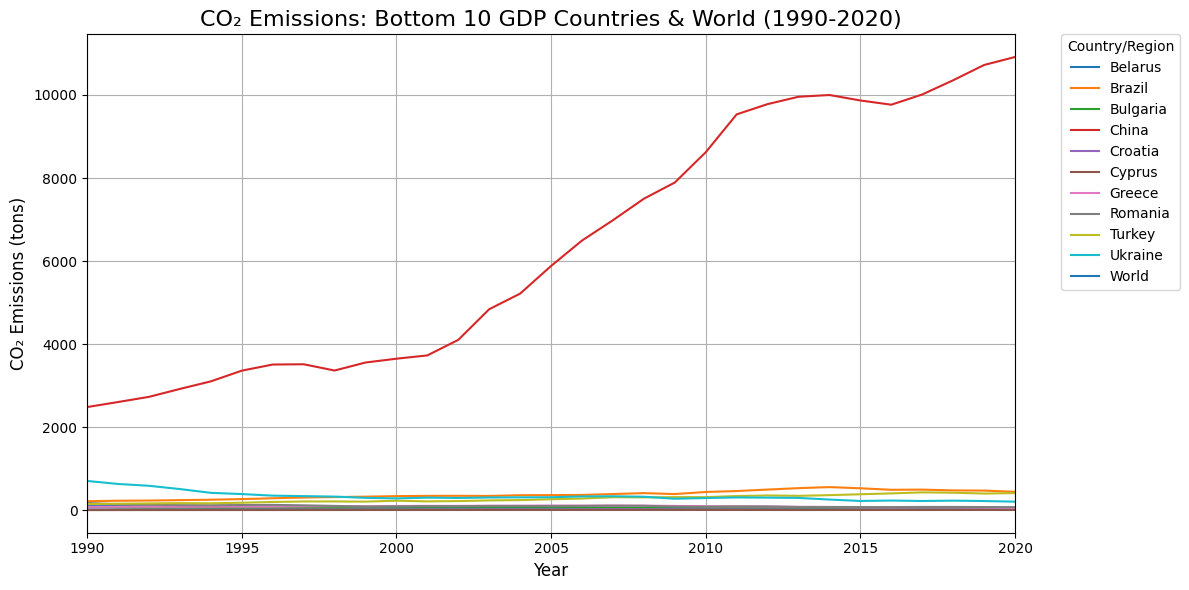

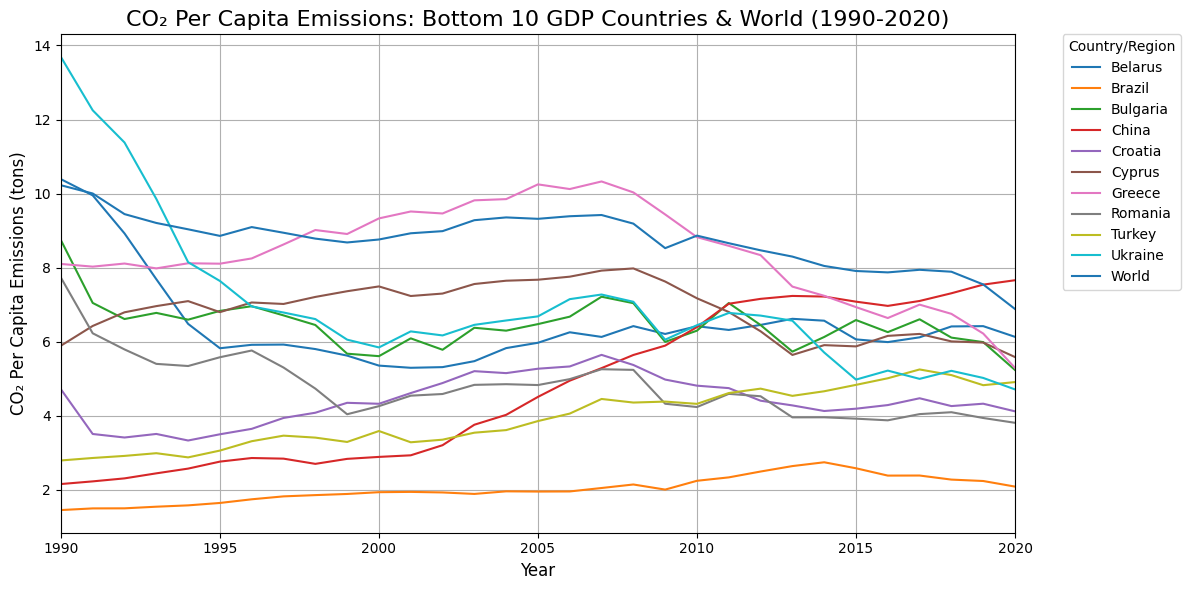

In [14]:
# Filter data for the years 2015-2020
data_2015_2020 = cleaned_df[(cleaned_df['year'] >= 2015) & (cleaned_df['year'] <= 2020)]

# Calculate the average GDP for each country between 2015 and 2020
avg_gdp = data_2015_2020.groupby('iso_code', as_index=False).agg({'gdp_per_capita': 'mean'})

# Get the bottom 10 countries with the lowest average GDP
bottom_gdp_countries = avg_gdp.nsmallest(10, 'gdp_per_capita')['iso_code'].tolist()

# Create a copy of the filtered data to avoid SettingWithCopyWarning
small_countries_data = cleaned_df[cleaned_df['iso_code'].isin(bottom_gdp_countries)].copy()

# Calculate the global average per capita CO2 emissions
global_avg = cleaned_df.groupby('year', as_index=False).agg({'co2_per_capita': 'mean'})
global_avg['iso_code'] = 'World'  # Add a label for the global average

# Combine big countries data with global average
combined_data = pd.concat([small_countries_data, global_avg], ignore_index=True)

# Mapping ISO codes to full country names (Update this as necessary if iso_code to country mapping is available)
data_latest_year = cleaned_df[cleaned_df['year'] == cleaned_df['year'].max()]
country_name_mapping = {row['iso_code']: row['country'] for _, row in data_latest_year.iterrows()}
country_name_mapping['World'] = 'World'  # Include "World" for global average

# Replace ISO codes with country names
combined_data['country_name'] = combined_data['iso_code'].map(country_name_mapping)

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='year', y='co2', hue='country_name', palette='tab10')
plt.title("CO₂ Emissions: Bottom 10 GDP Countries & World (1990-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Emissions (tons)", fontsize=12)
plt.xlim(1990, 2020)
plt.legend(title="Country/Region", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='year', y='co2_per_capita', hue='country_name', palette='tab10')
plt.title("CO₂ Per Capita Emissions: Bottom 10 GDP Countries & World (1990-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Per Capita Emissions (tons)", fontsize=12)
plt.xlim(1990, 2020)
plt.legend(title="Country/Region", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

## **5. Correlation between different sources**

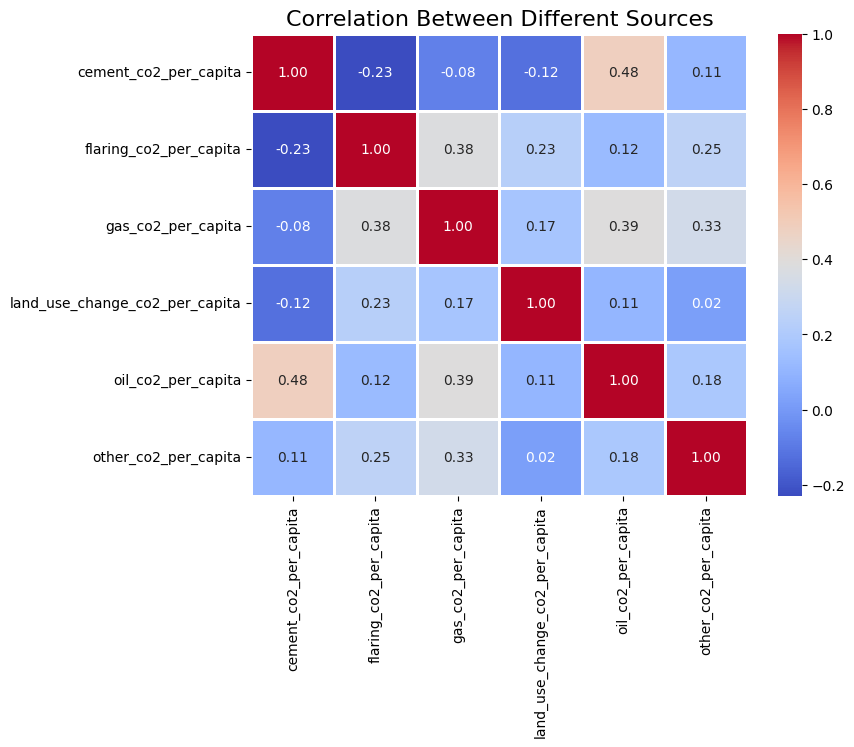

In [15]:
def plot_sources_correlation(df, sources):
    # Filter the data for the years 1990-2020
    df_filtered = df[(df['year'] >= 1990) & (df['year'] <= 2020)]

    # Select relevant columns for the sources and year
    df_sources = df_filtered[['year'] + sources]

    # Compute the correlation matrix
    correlation_matrix = df_sources[sources].corr()

    # Plot the heatmap of the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
    plt.title('Correlation Between Different Sources', fontsize=16)
    plt.show()

# List of sources to analyze
sources = ['cement_co2_per_capita', 'flaring_co2_per_capita',
         'gas_co2_per_capita', 'land_use_change_co2_per_capita',
         'oil_co2_per_capita', 'other_co2_per_capita']

# Plot the correlation between different sources
plot_sources_correlation(cleaned_df, sources)

## **6. Analysing the global trend of each source over time**

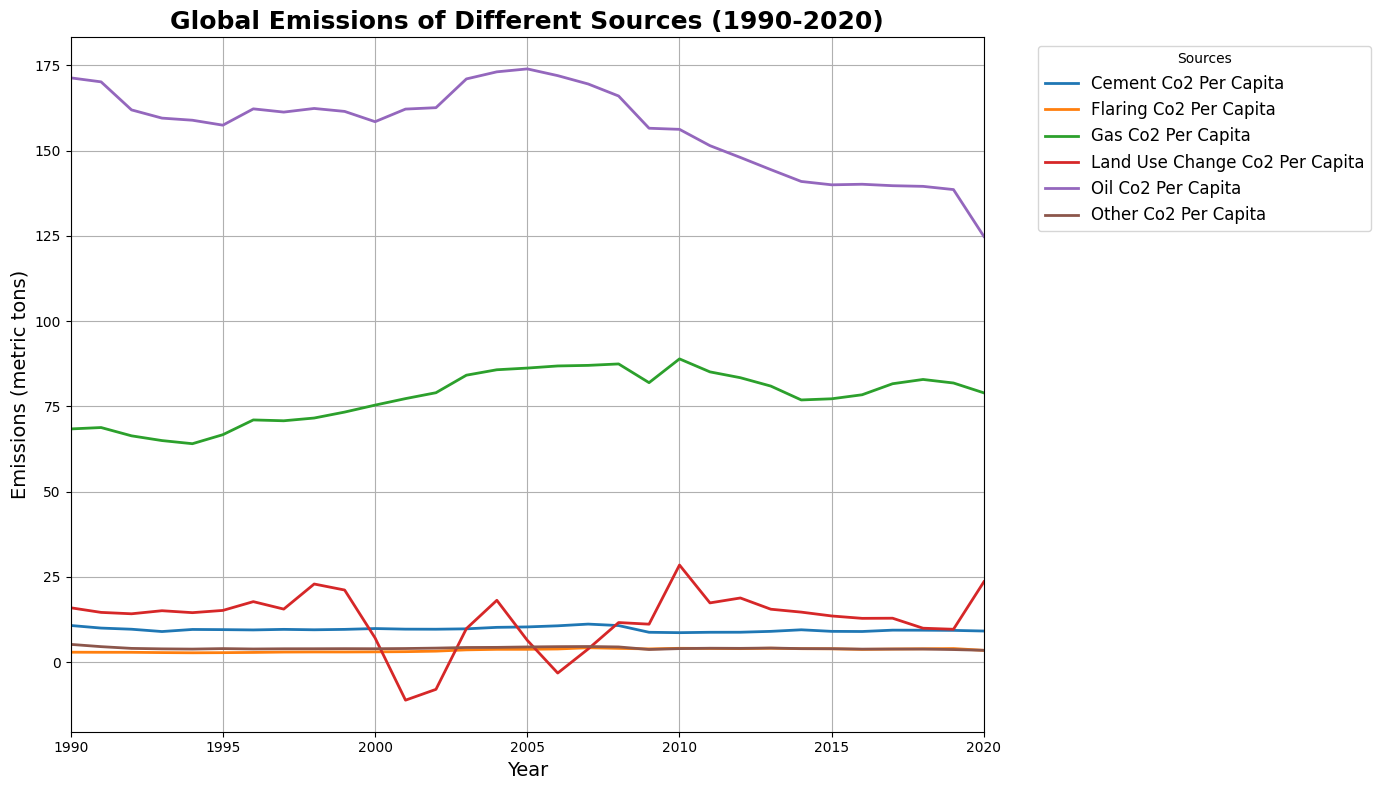

In [16]:
def global_trends(df, sources):
    df_filtered = df[(df['year'] >= 1990) & (df['year'] <= 2020)]  # Filter data for 1990-2020

    # Create a single plot
    plt.figure(figsize=(14, 8))

    for source in sources:
        global_trend = df_filtered.groupby('year').agg({source: 'sum'}).reset_index()
        sns.lineplot(data=global_trend, x='year', y=source, label=source.replace('_', ' ').title(), linewidth=2)

    plt.title('Global Emissions of Different Sources (1990-2020)', fontsize=18, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Emissions (metric tons)', fontsize=14)
    plt.xlim(1990, 2020)
    plt.xticks(range(1990, 2021, 5))
    plt.legend(title='Sources', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# List of sources to analyze
sources = ['cement_co2_per_capita', 'flaring_co2_per_capita',
         'gas_co2_per_capita', 'land_use_change_co2_per_capita',
         'oil_co2_per_capita', 'other_co2_per_capita']

# Plot global trends for each gas
global_trends(cleaned_df, sources)

## **7. Mapping ISO Codes to Countries & Defining Continents**

In [17]:
# Mapping ISO codes to full country names
data_latest_year = cleaned_df[cleaned_df['year'] == cleaned_df['year'].max()]
country_name_mapping = {row['iso_code']: row['country'] for _, row in data_latest_year.iterrows()}
country_name_mapping['World'] = 'World'  # Include "World" for global average

# Replace ISO codes with country names
cleaned_df['country_name'] = cleaned_df['iso_code'].map(country_name_mapping)

In [18]:
# Specify the path to the downloaded shapefile
shapefile_path = 'https://raw.githubusercontent.com/riyachandaria/BSc-Data-Science-Project/main/Data%20Files/ne_110m_admin_0_countries.shp'

# Load the shapefile using geopandas
world = gpd.read_file(shapefile_path)

# Filter relevant columns
world = world[['ISO_A3', 'CONTINENT']]

# Merge the country iso_codes with the continent info from the world GeoDataFrame
df2 = cleaned_df.merge(world, left_on='iso_code', right_on='ISO_A3', how='left')

# Display the DataFrame with region information
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         1320 non-null   object 
 1   year                            1320 non-null   int64  
 2   iso_code                        1320 non-null   object 
 3   population                      1320 non-null   float64
 4   gdp                             1320 non-null   float64
 5   cement_co2                      1320 non-null   float64
 6   cement_co2_per_capita           1320 non-null   float64
 7   co2                             1320 non-null   float64
 8   co2_growth_abs                  1320 non-null   float64
 9   co2_growth_prct                 1320 non-null   float64
 10  co2_per_capita                  1320 non-null   float64
 11  co2_per_gdp                     1320 non-null   float64
 12  coal_co2                        13

In [19]:
# Identifying missing ISO_A3 codes

# Find rows without an ISO_A3 code in df2
missing_iso_rows = df2[df2['ISO_A3'].isnull()]

# Get the unique values of the 'iso_code' column from these rows
unique_missing_iso_codes = missing_iso_rows['iso_code'].unique()

# Print the unique missing iso codes
unique_missing_iso_codes

array(['FRA', 'MLT', 'NOR'], dtype=object)

In [20]:
# Manually add missing countries with their respective continents
missing_countries = {
    'FRA': 'Europe',  # France
    'NOR': 'Europe',  # Norway
    'MLT': 'Europe',  # Malta
}

# Create a DataFrame with these missing countries
missing_df = pd.DataFrame(list(missing_countries.items()), columns=['ISO_A3', 'CONTINENT'])

# Append the manually added countries to the world GeoDataFrame
world = pd.concat([world, missing_df], ignore_index=True)

# Merge the cleaned_df with the updated world GeoDataFrame
df2 = cleaned_df.merge(world[['ISO_A3', 'CONTINENT']], left_on='iso_code', right_on='ISO_A3', how='left')

# Display the DataFrame with region information
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         1320 non-null   object 
 1   year                            1320 non-null   int64  
 2   iso_code                        1320 non-null   object 
 3   population                      1320 non-null   float64
 4   gdp                             1320 non-null   float64
 5   cement_co2                      1320 non-null   float64
 6   cement_co2_per_capita           1320 non-null   float64
 7   co2                             1320 non-null   float64
 8   co2_growth_abs                  1320 non-null   float64
 9   co2_growth_prct                 1320 non-null   float64
 10  co2_per_capita                  1320 non-null   float64
 11  co2_per_gdp                     1320 non-null   float64
 12  coal_co2                        13

In [21]:
# Checking continents
print(df2['CONTINENT'].unique())

['Oceania' 'Europe' 'South America' 'North America' 'Asia']


## **8. Regional Contributions**

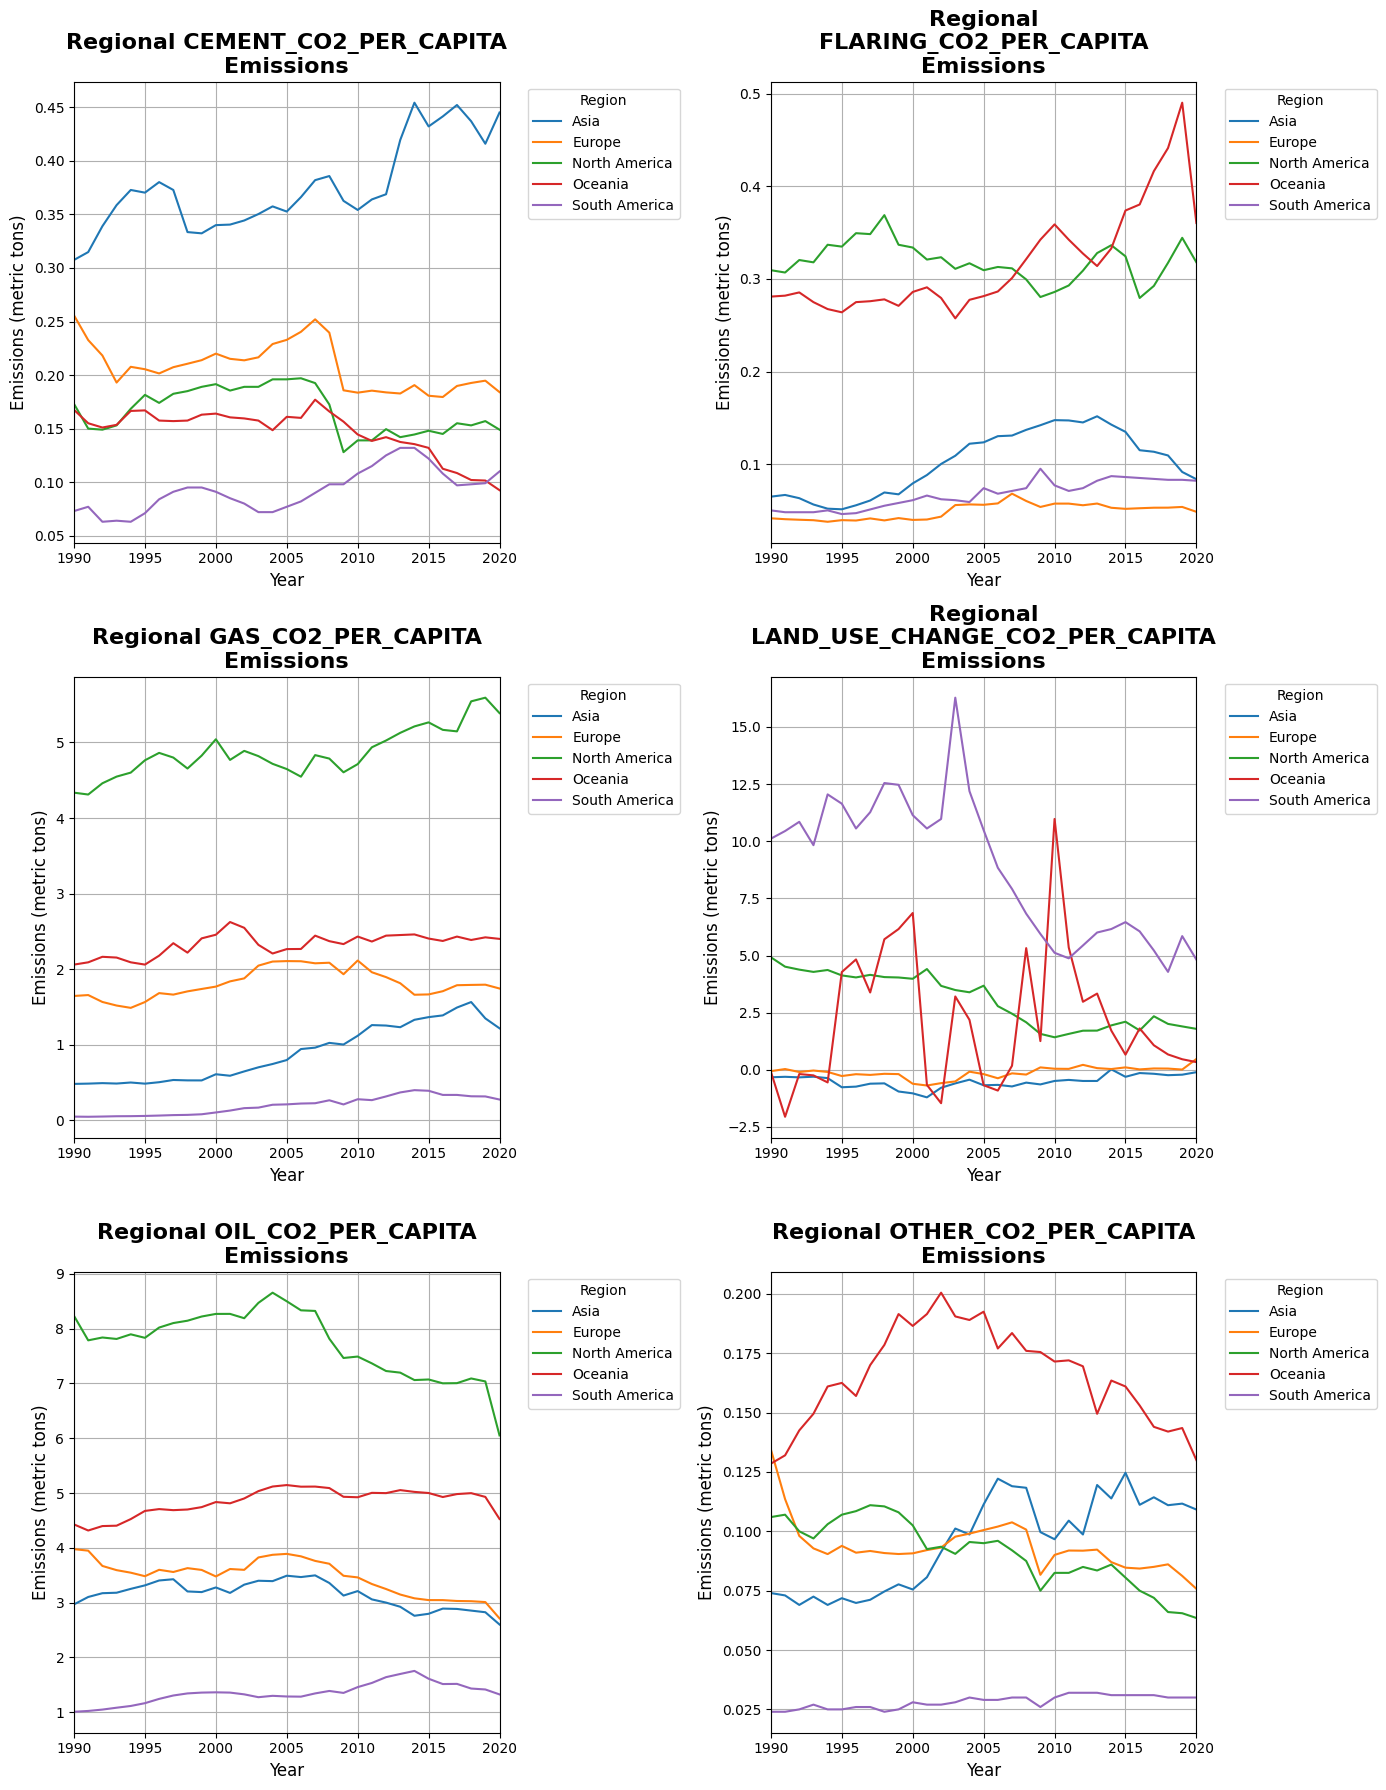

In [22]:
def regional_emissions_analysis(df, sources):
    """
    Analyze different sources emissions by region.

    Parameters:
    - df: DataFrame containing emissions data.
    - sources: List of different sources to analyze.
    """
    # Count the number of unique countries (ISO_A3) in each continent
    country_count_by_continent = df.groupby('CONTINENT')['ISO_A3'].nunique().reset_index()
    country_count_by_continent.rename(columns={'ISO_A3': 'num_countries'}, inplace=True)

    # Merge this count back to the original dataframe
    df = df.merge(country_count_by_continent, on='CONTINENT', how='left')

    # Group by continent and year, then sum the emissions, and divide by the number of countries
    regional_data = df.groupby(['CONTINENT', 'year'])[sources].sum().reset_index()
    regional_data['num_countries'] = df.groupby(['CONTINENT', 'year'])['num_countries'].first().values

    # Normalize emissions by dividing by the number of countries in each continent
    for source in sources:
        regional_data[source] = regional_data[source] / regional_data['num_countries']

    # Plotting setup
    df_filtered = regional_data[(regional_data['year'] >= 1990) & (regional_data['year'] <= 2020)]  # Filter data for 1990-2020
    num_sources = len(sources)
    num_cols = 2  # Adjust based on preference
    num_rows = math.ceil(num_sources / num_cols)

    # Creat subplots for each source
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 6 * num_rows))
    axes = axes.flatten()

    for i, source in enumerate(sources):
        sns.lineplot(
            data=regional_data,
            x='year',
            y=source,
            hue='CONTINENT',
            ax=axes[i],
            palette='tab10'
        )
        axes[i].set_title(textwrap.fill((f'Regional {source.upper()} Emissions'), width=30), fontsize=16, fontweight='bold')
        axes[i].set_xlabel('Year', fontsize=12)
        axes[i].set_ylabel('Emissions (metric tons)', fontsize=12)
        axes[i].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].set_xlim(1990, 2020)
        axes[i].set_xticks(range(1990, 2021, 5))
        axes[i].grid(True)

    # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

regional_emissions_analysis(df2, sources)

In [23]:
# Creating a column for total_ghg per capita
df2['total_ghg_per_capita'] = df2['total_ghg'] / df2['population']

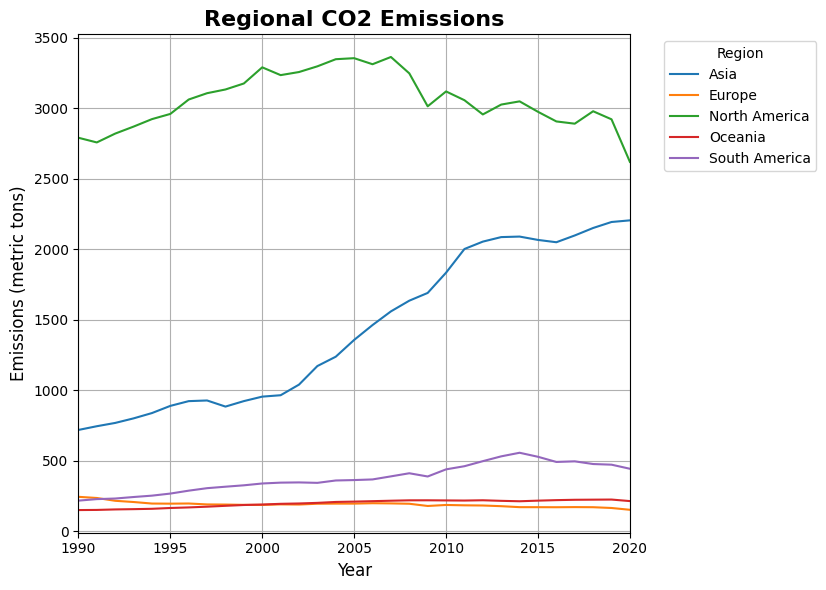

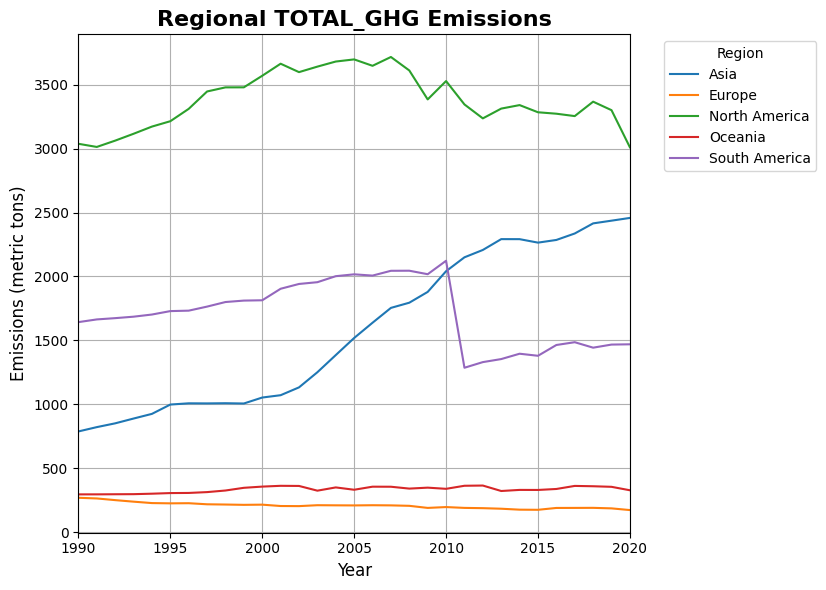

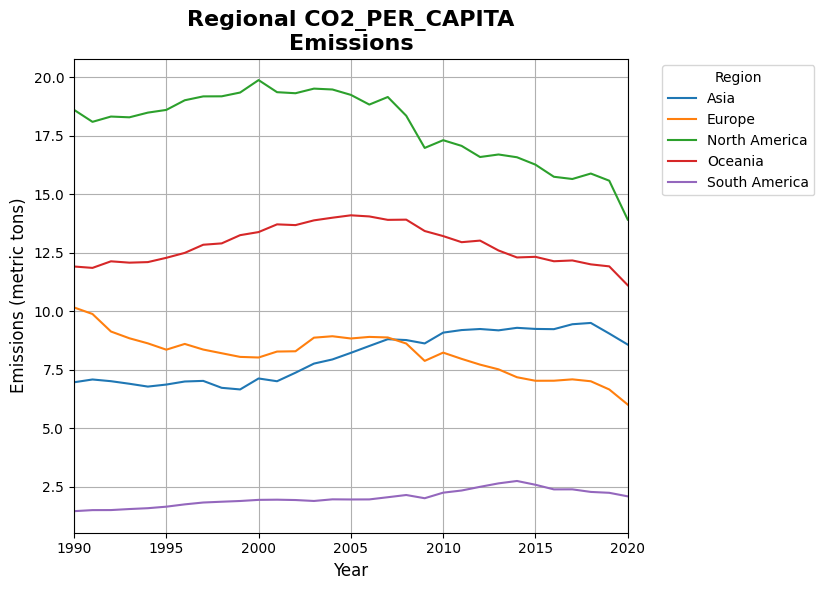

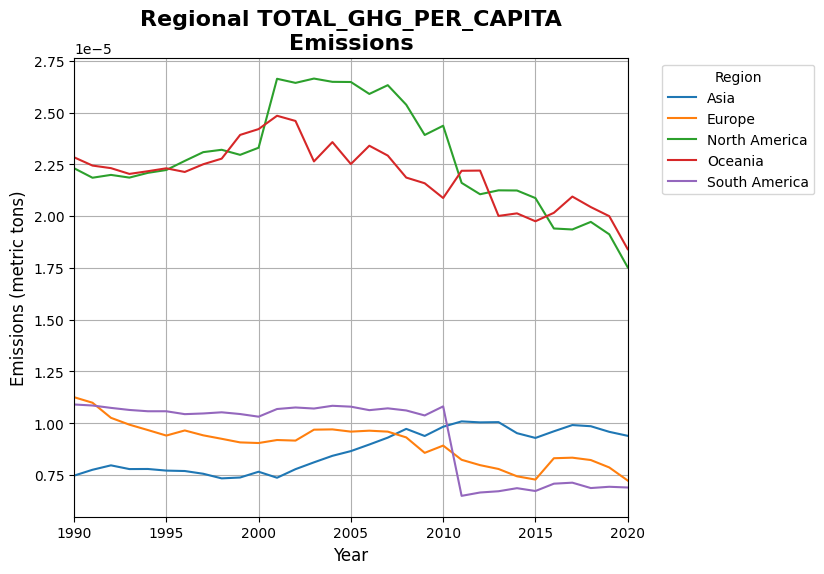

In [24]:
regional_emissions_analysis(df2, ['co2'])
regional_emissions_analysis(df2, ['total_ghg'])
regional_emissions_analysis(df2, ['co2_per_capita'])
regional_emissions_analysis(df2, ['total_ghg_per_capita'])

## **9. Descriptive Statistics for `co2_per_capita` per Country**

In [25]:
country_stats = df2.groupby('country_name')['co2_per_capita'].describe().reset_index()

print("\033[1mCO2 per Capita Statistics by Country:\033[0m")
display(country_stats)

CO2 per Capita Statistics by Country:


country_name  count       mean       std     min      25%      50%  \
0        Australia   31.0  17.607839  1.114164  15.453  16.6875  17.4000   
1          Austria   31.0   8.282774  0.655564   6.974   7.6955   8.2180   
2          Belarus   31.0   6.459484  1.207581   5.294   5.8705   6.1300   
3          Belgium   31.0  10.977097  1.614346   7.880   9.2670  11.9450   
4           Brazil   31.0   2.020871  0.348102   1.451   1.8380   1.9540   
5         Bulgaria   31.0   6.463258  0.637978   5.235   6.0990   6.4500   
6           Canada   31.0  16.769258  1.092189  13.800  16.1330  16.5290   
7            China   31.0   4.756129  2.049082   2.154   2.8370   4.5080   
8          Croatia   31.0   4.411258  0.632146   3.330   4.0990   4.3240   
9           Cyprus   31.0   6.851097  0.724725   5.584   6.1825   7.0180   
10         Czechia   31.0  11.823194  1.588000   8.707  10.4115  12.2270   
11         Denmark   31.0   9.448581  2.453527   4.858   7.2705  10.1690   
12         Estonia   31.0  13.329871  3.045501   6.949  12.0210  13.1430   
13         Finland   31.0  10.767710  1.800018   6.824   9.4775  11.0330   
14          France   31.0   6.278419  0.835568   4.366   5.6460   6.6700   
15         Germany   31.0  10.664161  1.179832   7.767   9.8285  10.8100   
16          Greece   31.0   8.408903  1.281903   5.291   7.7330   8.3360   
17         Hungary   31.0   5.601258  0.653475   4.413   5.0570   5.8390   
18         Ireland   31.0   9.820935  1.495043   7.101   8.3745   9.6080   
19           Italy   31.0   7.372935  1.056032   5.097   6.4275   7.7200   
20           Japan   31.0   9.668387  0.445229   8.302   9.4450   9.8060   
21      Kazakhstan   31.0  12.914290  2.533535   7.817  10.3580  13.8550   
22          Latvia   31.0   3.909161  0.935622   2.960   3.4860   3.6540   
23       Lithuania   31.0   4.627903  1.430033   3.290   4.0690   4.3440   
24      Luxembourg   31.0  21.939839  5.106995  12.798  18.4995  21.4250   
25           Malta   31.0   5.839226  1.388316   2.900   5.7590   6.4220   
26     Netherlands   31.0  10.479548  0.910142   7.840   9.8170  10.8190   
27     New Zealand   31.0   8.046968  0.576299   6.765   7.6635   7.9180   
28          Norway   18.0   8.908778  0.576877   7.664   8.5865   8.8665   
29          Poland   31.0   8.711871  0.602388   7.870   8.2555   8.5850   
30        Portugal   31.0   5.385806  0.721739   4.049   4.8855   5.1310   
31         Romania   31.0   4.791581  0.855872   3.808   4.0685   4.5900   
32          Russia   31.0  11.493935  1.562777   9.922  10.7005  11.3230   
33        Slovakia   31.0   7.669742  1.218451   5.699   6.6390   7.8100   
34        Slovenia   31.0   7.630742  0.718948   6.070   6.9970   7.7110   
35     South Korea   31.0  10.282355  2.106860   5.678   9.0220  10.4130   
36           Spain   31.0   6.589129  1.020124   4.510   5.9000   6.3420   
37          Sweden   31.0   5.693871  1.039854   3.538   4.7865   5.9520   
38     Switzerland   31.0   5.683742  0.768491   3.963   5.2320   6.0690   
39          Turkey   31.0   3.942129  0.781598   2.791   3.3010   3.8550   
40         Ukraine   31.0   7.007581  2.101916   4.710   5.9485   6.5720   
41  United Kingdom   31.0   8.545290  1.696850   4.865   7.4250   9.4390   
42   United States   31.0  19.012419  2.086815  14.034  17.1635  20.2490   

         75%     max  
0   18.60150  19.216  
1    8.67000   9.614  
2    6.43600  10.389  
3   12.28300  12.790  
4    2.25800   2.742  
5    6.74300   8.741  
6   17.71600  18.482  
7    7.05200   7.659  
8    4.84650   5.643  
9    7.42700   7.978  
10  12.62100  15.945  
11  11.25400  14.250  
12  14.23650  23.506  
13  12.09100  13.937  
14   6.91750   7.375  
15  11.38250  13.289  
16   9.44900  10.327  
17   5.99750   7.072  
18  11.15350  12.433  
19   8.22300   8.670  
20   9.96050  10.301  
21  14.83700  16.570  
22   3.97450   7.311  
23   4.60750   9.970  
24  24.38800  32.181  
25   6.60250   7.690  
26  11.19300  11.732  
27   8.49450   9.

## **10. Displaying on an interactive map**

In [26]:
# Sum the total emissions per region/country, replace with 'co2_per_capita' if needed
region_emissions = df2.groupby('country_name')['co2_per_capita'].sum().reset_index().round(2)
region_emissions.columns = ['Country Name', 'sum']

# Load the '110m' cultural vectors dataset from a local file path
world = gpd.read_file('https://raw.githubusercontent.com/riyachandaria/BSc-Data-Science-Project/main/Data%20Files/ne_110m_admin_0_countries.shp')

# Ensure CRS is set
if world.crs is None:
    world.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS 84 if not defined

# Merge the world map with the sum of CO2 emissions based on country names
world = world.merge(region_emissions, left_on='ADMIN', right_on='Country Name', how='left')

# Filter out rows with count 0 emissions
world = world[world['sum'] > 0]

# Create a Folium Map centered at the mean of latitude and longitude
m = folium.Map(location=[world.geometry.centroid.y.mean(), world.geometry.centroid.x.mean()], zoom_start=2)

# Add GeoJSON data to the map, with tooltips showing the country and the sum of CO2 emissions
folium.GeoJson(
    world,
    name='geojson',
    tooltip=folium.features.GeoJsonTooltip(fields=['ADMIN', 'sum'], aliases=['Country', 'Emissions'])
).add_to(m)

# Add sum values as text annotations using MarkerCluster
marker_cluster = MarkerCluster().add_to(m)
for idx, row in world.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        popup=f"{row['ADMIN']}: {row['sum']:.0f}",
    ).add_to(marker_cluster)

# Display the map
display(m)

<ipython-input-26-70b75410637b>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[world.geometry.centroid.y.mean(), world.geometry.centroid.x.mean()], zoom_start=2)


# **Models**

## **`co2`**

### **Step 1: Data Preparation**

In [27]:
# Load your dataset here
comparison_df = df2

# Feature Engineering: Yearly growth rate for CO2 emissions
comparison_df['co2_growth_abs'] = comparison_df.groupby('country')['co2'].diff()
comparison_df['co2_growth_prct'] = comparison_df.groupby('country')['co2'].pct_change() * 100

# Select features and target variable
features = ['population', 'gdp', 'cement_co2_per_capita', 'co2_per_capita',
            'coal_co2_per_capita', 'energy_per_capita', 'flaring_co2_per_capita',
            'gas_co2_per_capita', 'land_use_change_co2_per_capita', 'methane_per_capita',
            'nitrous_oxide_per_capita', 'oil_co2_per_capita', 'other_co2_per_capita', 'total_ghg']

target = 'co2'

X = comparison_df[features]
y = comparison_df[target]

### **Step 2: Train-Test Split**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Step 3: ARIMA for Time-Series Forecasting**

In [29]:
# Top 3 highest co2 countries

# Calculate the average CO2 emissions per capita for each country between 2015-2020
data_2015_2020 = cleaned_df[(cleaned_df['year'] >= 2015) & (cleaned_df['year'] <= 2020)]
avg_co2 = data_2015_2020.groupby('country', as_index=False).agg({'co2': 'mean'})

# Get the top 3 countries with the highest average CO2 emissions per capita
top_co2_countries = avg_co2.nlargest(3, 'co2')

# Display the results
print(top_co2_countries[['country', 'co2']])

          country           co2
7           China  10272.020000
42  United States   5199.356167
32         Russia   1665.022500


In [30]:
# Top 3 lowest co2 countries

# Calculate the average CO2 emissions per capita for each country between 2015-2020
data_2015_2020 = cleaned_df[(cleaned_df['year'] >= 2015) & (cleaned_df['year'] <= 2020)]
avg_co2 = data_2015_2020.groupby('country', as_index=False).agg({'co2': 'mean'})

# Get the top 3 countries with the lowest average CO2 emissions per capita
bottom_co2_countries = avg_co2.nsmallest(3, 'co2')

# Display the results
print(bottom_co2_countries[['country', 'co2']])

   country     co2
25   Malta  1.5575
9   Cyprus  7.2375
22  Latvia  7.3675


In [31]:
# Countries used for plotting

# Define list of countries to analyse
big_country_names = ['China', 'United States', 'Russia']
small_country_names = ['Malta', 'Cyprus', 'Latvia']

In [32]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²:", r2_score(y_true, y_pred))
    print("MAPE:", mean_absolute_percentage_error(y_true, y_pred))

In [33]:
# Linear ARIMA - Multiple Countries - predictions from 2010 onwards

def arima_forecast_multiple_2010(df, country_names, target_col, forecast_start=2010, years_ahead=20):
    plt.figure(figsize=(12, 7))
    colors = plt.get_cmap('tab10', len(country_names))  # Generate distinct colours for each country

    for i, country_name in enumerate(country_names):
        country_data = df[df['country'] == country_name].sort_values(by='year')
        country_data = country_data.dropna(subset=[target_col])
        country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
        country_data.set_index('year', inplace=True)
        country_data.index = country_data.index.to_period('Y').to_timestamp()
        time_series = country_data[target_col]

        if len(time_series) < 2:
            print(f"Not enough data for {country_name}, skipping.")
            continue

        # Ensure forecast starts from 2010
        historical_end = country_data.index[-1].year
        forecast_years = list(range(forecast_start, forecast_start + years_ahead + 1))
        start_point = country_data[country_data.index.year == forecast_start]

        if start_point.empty:
            print(f"No data available for {country_name} at {forecast_start}, skipping.")
            continue

        # Fit ARIMA model using data up to 2010
        train_series = time_series.loc[:f"{forecast_start}"]
        model = ARIMA(train_series, order=(5, 1, 0))  # (p, d, q) parameters can be optimized
        model_fit = model.fit()

        # Forecast future values from 2010 onward
        forecast = model_fit.forecast(steps=years_ahead)
        full_forecast = [train_series.loc[f"{forecast_start}"].item()] + forecast.tolist()

        # Extract actual values for evaluation
        actual_values = country_data.loc[f"{forecast_start}":, target_col].values
        predicted_values = forecast[:len(actual_values)]  # Match the length of available actual data

        # Evaluation
        if len(actual_values) > 0:
            evaluate_model(actual_values, predicted_values, f'ARIMA - {country_name}')

        # Assign a colour for this country
        color = colors(i)

        # Plot the historical and forecast data separately with the same color
        plt.plot(country_data.index.year, time_series, linestyle='solid', alpha=0.7, color=color, label=f'{country_name} Historical')
        plt.plot(forecast_years, full_forecast, linestyle='dashed', color=color, label=f'{country_name} Forecast')

    plt.title(f'ARIMA Forecast for {target_col} Across Multiple Countries')
    plt.xlabel('Year')
    plt.ylabel(target_col)
    plt.legend()
    plt.grid()
    plt.show()


ARIMA - China Evaluation
MAE: 1366.5475333646484
MSE: 2479128.8094683774
RMSE: 1574.524947235952
R²: -6.361342320597691
MAPE: 0.13463972935460766


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'



ARIMA - United States Evaluation
MAE: 145.90955947207203
MSE: 42679.052301132
RMSE: 206.58909046978255
R²: 0.262853787938648
MAPE: 0.028260366828609742

ARIMA - Russia Evaluation
MAE: 85.32721500233657
MSE: 8436.885716145556
RMSE: 91.85252155572843
R²: -7.877359838527436
MAPE: 0.05102182062700773


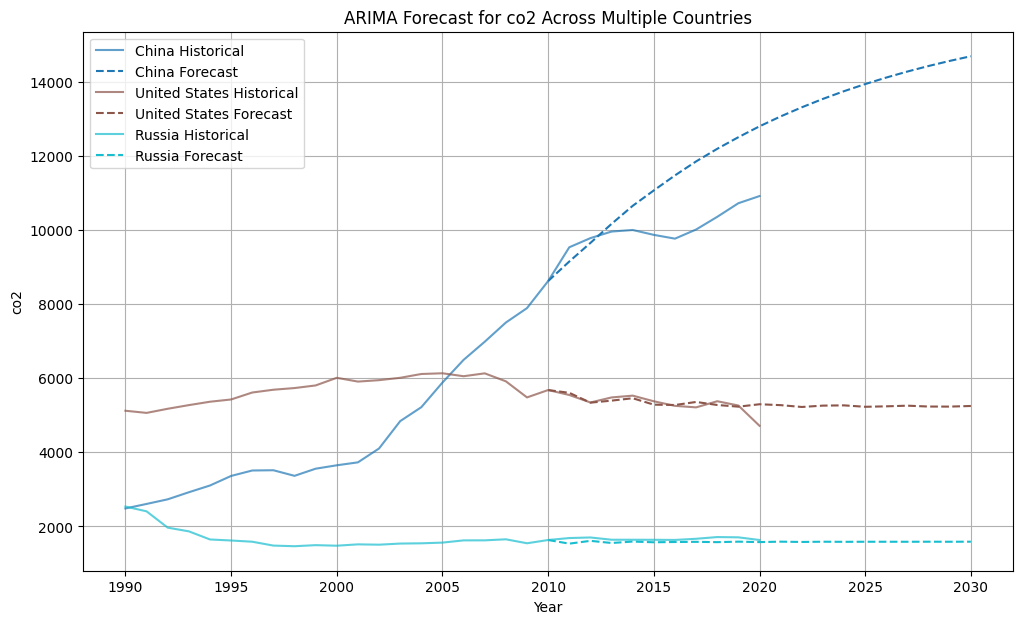

In [34]:
arima_forecast_multiple_2010(comparison_df, big_country_names, 'co2')


ARIMA - Malta Evaluation
MAE: 0.6498777642905548
MSE: 0.6438334132053863
RMSE: 0.8023923062974784
R²: -1.5917074177145785
MAPE: 0.40608923934517915

ARIMA - Cyprus Evaluation
MAE: 0.3269456590982372
MSE: 0.2078209781040611
RMSE: 0.45587386205403474
R²: -0.2546809583042673
MAPE: 0.04688468932965308

ARIMA - Latvia Evaluation
MAE: 4.1401048747993965
MSE: 19.194454782632775
RMSE: 4.381147655881136
R²: -106.87277129737511
MAPE: 0.5604686226630373


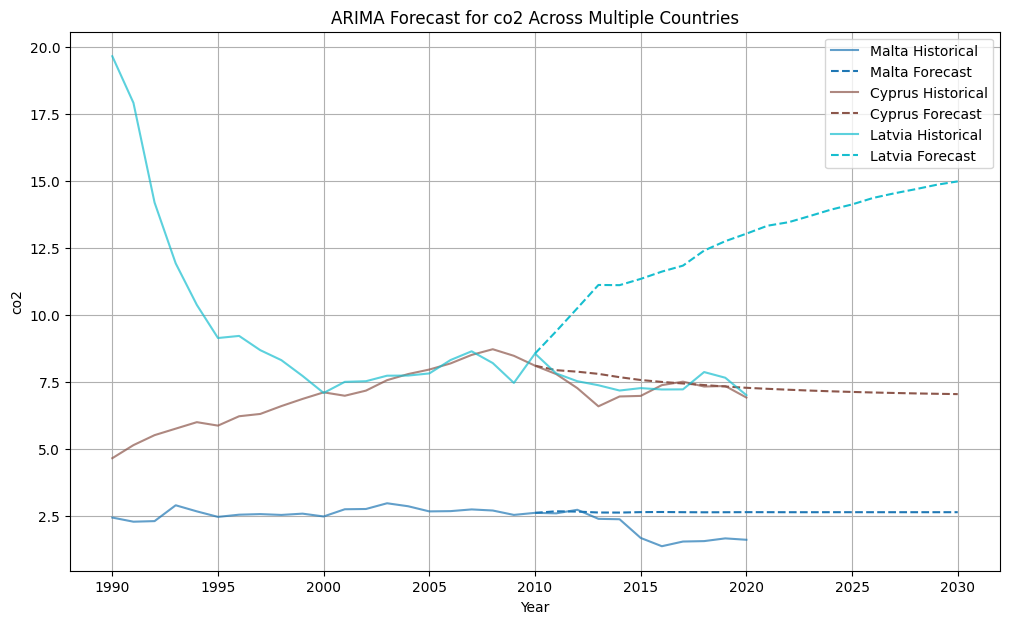

In [35]:
arima_forecast_multiple_2010(comparison_df, small_country_names, 'co2')

### **Step 4: LSTM for Time-Series Forecasting**

In [36]:
# LSTM Model - predictions from 2010 onwards

def lstm_forecast_2010(df, country_names, target_col, years_ahead=20, lookback=10):
    """
    LSTM-based time-series forecasting model for CO2 emissions.
    Historic data starts from 1990 and ends in 2020, with predictions fitted using data up to 2010.
    The historic and prediction lines meet in 2010.

    Parameters:
        df (DataFrame): The dataset containing CO2 emissions and other variables.
        country_names (list): List of country names for which to forecast.
        target_col (str): Column name for the target variable (e.g., 'co2').
        years_ahead (int): Number of years to predict.
        lookback (int): Number of past years to use for prediction.
    """
    plt.figure(figsize=(12, 7))
    colors = plt.get_cmap('tab10', len(country_names))

    for i, country_name in enumerate(country_names):
        country_data = df[df['country'] == country_name].sort_values(by='year')
        country_data = country_data.dropna(subset=[target_col])
        country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
        country_data.set_index('year', inplace=True)
        country_data.index = country_data.index.to_period('Y').to_timestamp()
        country_data_full = country_data[(country_data.index.year >= 1990) & (country_data.index.year <= 2020)]  # Historic data from 1990 to 2020
        country_data = country_data[(country_data.index.year >= 1990) & (country_data.index.year <= 2010)]  # Data for LSTM fitting

        if len(country_data) < lookback:
            print(f"Not enough data for {country_name}, skipping.")
            continue

        time_series = country_data[target_col].values.reshape(-1, 1)

        # Normalize data
        scaler = MinMaxScaler(feature_range=(0, 1))
        time_series_scaled = scaler.fit_transform(time_series)

        # Create sequences
        X, y = [], []
        for j in range(len(time_series_scaled) - lookback):
            X.append(time_series_scaled[j:j + lookback])
            y.append(time_series_scaled[j + lookback])

        X, y = np.array(X), np.array(y)

        # Build LSTM model
        model = Sequential([
            Input(shape=(lookback, 1)),
            LSTM(50, return_sequences=True),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(25, activation='relu'),
            Dense(1)
        ])

        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=50, batch_size=16, verbose=0)

        # Forecast future values starting from 2010
        last_sequence = time_series_scaled[-lookback:].reshape(1, lookback, 1)
        forecast_scaled = []

        for _ in range(years_ahead):
            pred = model.predict(last_sequence)[0][0]
            forecast_scaled.append(pred)
            last_sequence = np.roll(last_sequence, -1)
            last_sequence[0, -1, 0] = pred

        forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1)).flatten()
        forecast_years = pd.date_range(start='2010', periods=years_ahead + 1, freq='YE').year
        full_forecast = np.concatenate((time_series[-1].flatten(), forecast))

        # Evaluation
        true_data = df[(df['country'] == country_name) & (df['year'].between(2010, 2010 + years_ahead))]
        if not true_data.empty:
            y_true = true_data[target_col].values
            y_pred = full_forecast[1:len(y_true)+1]
            evaluate_model(y_true, y_pred, f'LSTM - {country_name}')

        color = colors(i)
        plt.plot(country_data_full.index.year, country_data_full[target_col].values, linestyle='solid', alpha=0.7, color=color, label=f'{country_name} Historical')
        plt.plot(forecast_years, full_forecast, linestyle='dashed', color=color, label=f'{country_name} Forecast')

    plt.title(f'LSTM Forecast for {target_col} Across Multiple Countries (Historic Data from 1990 to 2020, Predictions from 2010)')
    plt.xlabel('Year')
    plt.ylabel(target_col)
    plt.legend()
    plt.grid()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

LSTM - China Evaluation
MAE: 4309.793551136363
MSE: 25693559.07297727
RMSE: 5068.881441992628
R²: -75.29256013173564
MAPE: 0.4212941975231089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━

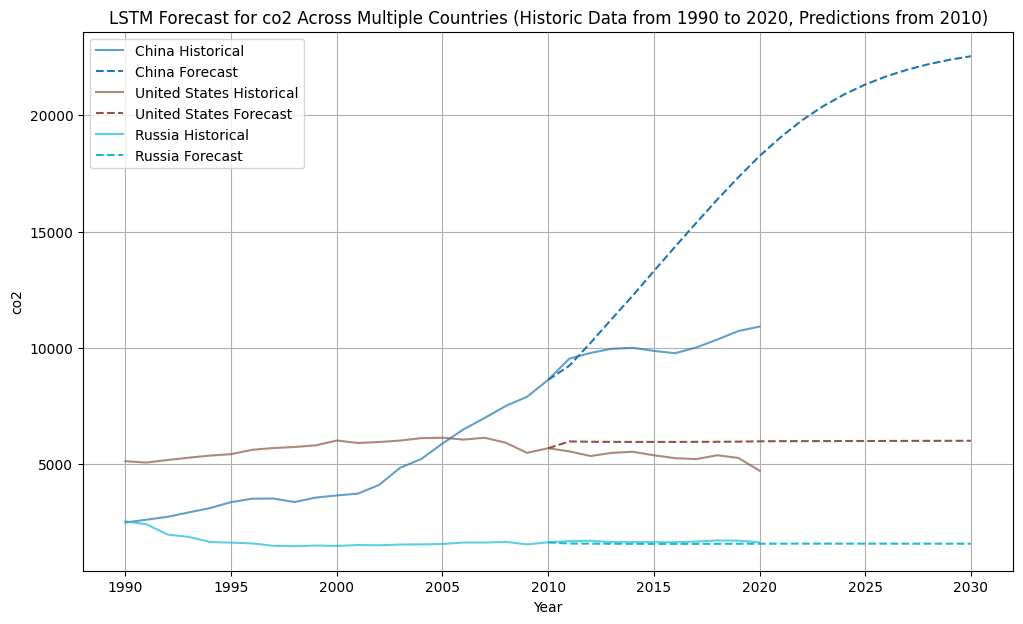

In [37]:
lstm_forecast_2010(comparison_df, big_country_names, 'co2')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

LSTM - Malta Evaluation
MAE: 0.7236067041917281
MSE: 0.7677583341844464
RMSE: 0.8762182000988374
R²: -2.0905587204795464
MAPE: 0.44824628683687795
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━

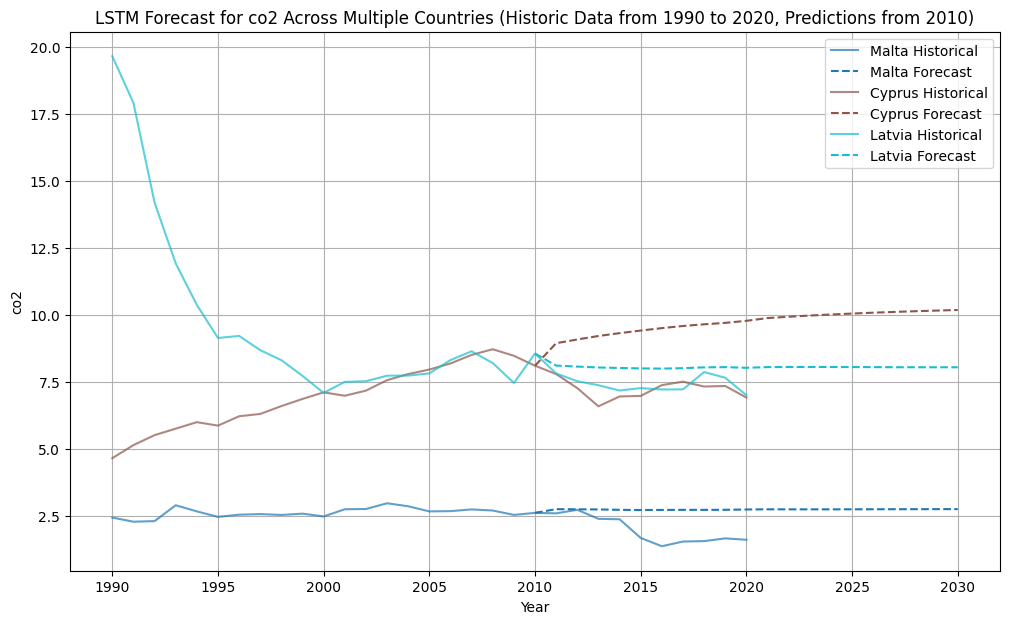

In [38]:
lstm_forecast_2010(comparison_df, small_country_names, 'co2')

### **Step 5a: Comparing ARIMA and LSTM Models - big_country_names**

In [39]:
# Extract Actual Data

# Dictionary to store actual values (historical data)
y_true_dict = {}

for country in big_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['co2'])  # Ensure no missing values
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)

    # Store historical CO2 values
    y_true_dict[country] = country_data['co2']

In [40]:
# Generate ARIMA Forecasts

years_ahead = 10  # Forecast years

y_pred_arima_dict = {}

for country in big_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['co2'])
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)
    country_data.index = country_data.index.to_period('Y').to_timestamp()

    # Explicitly set yearly frequency to avoid warnings
    #country_data = country_data.asfreq('YE')

    time_series = country_data['co2']

    if len(time_series) < 2:
        print(f"Not enough data for {country}, skipping.")
        continue

    # Fit ARIMA model
    try:
        model = ARIMA(time_series, order=(5,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=years_ahead)

        # Create forecast years
        forecast_years = pd.date_range(start=country_data.index[-1], periods=years_ahead + 1, freq='YE')

        # Store forecasted values
        y_pred_arima_dict[country] = pd.Series([time_series.iloc[-1]] + forecast.tolist(), index=forecast_years)

    except Exception as e:
        print(f"ARIMA failed for {country}: {e}")
        continue

In [41]:
# Generate LSTM Forecasts

lookback = 10  # Number of past years to use for prediction
years_ahead = 10  # Forecast years

y_pred_lstm_dict = {}

for country in big_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['co2'])
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)
    country_data.index = country_data.index.to_period('Y').to_timestamp()
    time_series = country_data['co2'].values.reshape(-1, 1)

    if len(time_series) < lookback:
        print(f"Not enough data for {country}, skipping.")
        continue

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    time_series_scaled = scaler.fit_transform(time_series)

    # Create sequences
    X, y = [], []
    for j in range(len(time_series_scaled) - lookback):
        X.append(time_series_scaled[j:j + lookback])
        y.append(time_series_scaled[j + lookback])

    X, y = np.array(X), np.array(y)

    # Build and train LSTM model
    model = Sequential([
        Input(shape=(lookback, 1)),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=50, batch_size=16, verbose=0)

    # Forecast future values
    last_sequence = time_series_scaled[-lookback:].reshape(1, lookback, 1)
    forecast_scaled = []

    for _ in range(years_ahead):
        pred = model.predict(last_sequence)[0][0]
        forecast_scaled.append(pred)
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[0, -1, 0] = pred

    forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1)).flatten()

    # Create forecast years
    forecast_years = pd.date_range(start=country_data.index[-1], periods=years_ahead + 1, freq='YE')

    # Store forecasted values
    y_pred_lstm_dict[country] = pd.Series([time_series[-1].flatten()[0]] + forecast.tolist(), index=forecast_years)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━

In [42]:
def plot_forecast_multiple(y_true_dict, y_pred_arima_dict, y_pred_lstm_dict, title="ARIMA vs LSTM Forecast for CO2 Emissions"):
    """
    Plots historical data and ARIMA vs. LSTM forecasts for multiple countries.

    Parameters:
    - y_true_dict: Dictionary with country names as keys and actual values as lists/arrays.
    - y_pred_arima_dict: Dictionary with ARIMA forecasts.
    - y_pred_lstm_dict: Dictionary with LSTM forecasts.
    """
    plt.figure(figsize=(12, 7))
    colors = plt.get_cmap('tab10', len(y_true_dict))

    for i, country in enumerate(y_true_dict.keys()):
        y_true = y_true_dict[country]
        y_pred_arima = y_pred_arima_dict.get(country, None)
        y_pred_lstm = y_pred_lstm_dict.get(country, None)

        # Assign color
        color = colors(i)

        # Plot actual data
        plt.plot(y_true.index, y_true, linestyle='solid', color=color, label=f'{country} Historical')

        # Plot ARIMA forecast
        if y_pred_arima is not None:
            # Align ARIMA forecast to start from 2020 (or the appropriate forecast start year)
            forecast_start_index = y_pred_arima.index[0]
            historical_end_index = y_true.index[-1]

            if forecast_start_index != historical_end_index:
                # Extend historical data to meet the forecast
                plt.plot([historical_end_index, forecast_start_index], [y_true.iloc[-1], y_pred_arima.iloc[0]], linestyle='dashed', color=color, alpha=0.7)

            # Plot the ARIMA forecast
            plt.plot(y_pred_arima.index, y_pred_arima, linestyle='dashed', color=color, alpha=0.7, label=f'{country} ARIMA')

        # Plot LSTM forecast
        if y_pred_lstm is not None:
            # Align LSTM forecast to start from 2020 (or the appropriate forecast start year)
            forecast_start_index = y_pred_lstm.index[0]
            historical_end_index = y_true.index[-1]

            # Manually set the LSTM forecast to start from 2020 if necessary
            if forecast_start_index.year > 2020:
                # Adjust the index to start at 2020, or create a new DataFrame from the historical data onward
                new_index = pd.date_range(start='2020-01-01', periods=len(y_pred_lstm), freq='A')
                y_pred_lstm.index = new_index

            if forecast_start_index != historical_end_index:
                # Make sure the forecast is aligned to the historical data
                if forecast_start_index.year > historical_end_index.year:
                    forecast_start_index = historical_end_index
                # Extend historical data to meet the forecast
                plt.plot([historical_end_index, forecast_start_index], [y_true.iloc[-1], y_pred_lstm.iloc[0]], linestyle='dotted', color=color, alpha=0.7)

            # Plot the LSTM forecast
            plt.plot(y_pred_lstm.index, y_pred_lstm, linestyle='dotted', color=color, alpha=0.7, label=f'{country} LSTM')

    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

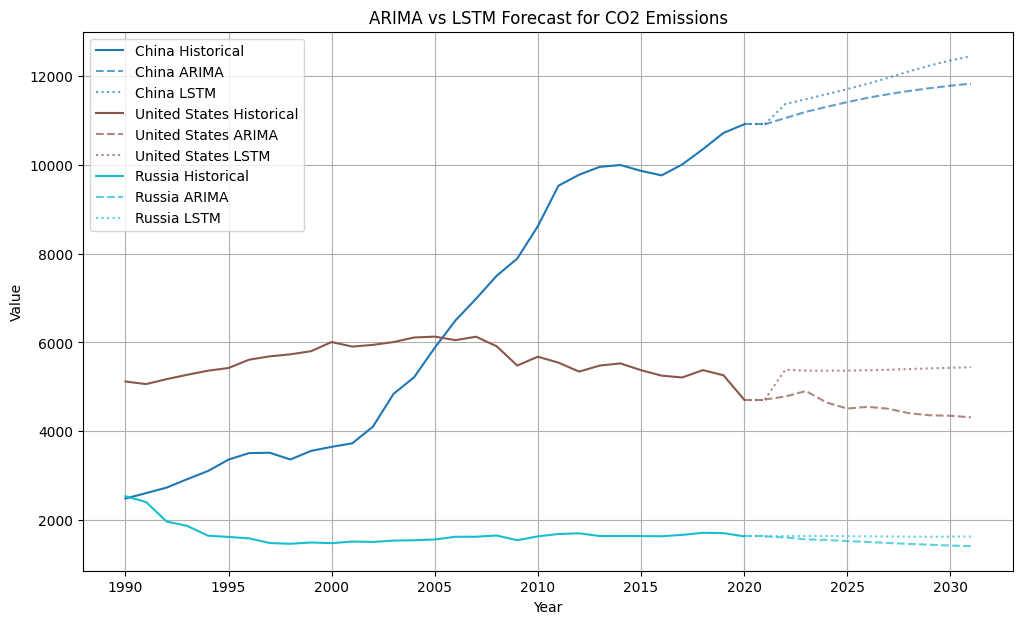

In [43]:
plot_forecast_multiple(y_true_dict, y_pred_arima_dict, y_pred_lstm_dict)

### **Step 5b: Comparing ARIMA and LSTM Models - small_country_names**

In [44]:
# Extract Actual Data

# Dictionary to store actual values (historical data)
y_true_dict = {}

for country in small_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['co2'])  # Ensure no missing values
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)

    # Store historical CO2 values
    y_true_dict[country] = country_data['co2']

In [45]:
# Generate ARIMA Forecasts

years_ahead = 10  # Forecast years

y_pred_arima_dict = {}

for country in small_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['co2'])
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)
    country_data.index = country_data.index.to_period('Y').to_timestamp()

    # Explicitly set yearly frequency to avoid warnings
    #country_data = country_data.asfreq('YE')

    time_series = country_data['co2']

    if len(time_series) < 2:
        print(f"Not enough data for {country}, skipping.")
        continue

    # Fit ARIMA model
    try:
        model = ARIMA(time_series, order=(5,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=years_ahead)

        # Create forecast years
        forecast_years = pd.date_range(start=country_data.index[-1], periods=years_ahead + 1, freq='YE')

        # Store forecasted values
        y_pred_arima_dict[country] = pd.Series([time_series.iloc[-1]] + forecast.tolist(), index=forecast_years)

    except Exception as e:
        print(f"ARIMA failed for {country}: {e}")
        continue

In [46]:
# Generate LSTM Forecasts

lookback = 10  # Number of past years to use for prediction
years_ahead = 10  # Forecast years

y_pred_lstm_dict = {}

for country in small_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['co2'])
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)
    country_data.index = country_data.index.to_period('Y').to_timestamp()
    time_series = country_data['co2'].values.reshape(-1, 1)

    if len(time_series) < lookback:
        print(f"Not enough data for {country}, skipping.")
        continue

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    time_series_scaled = scaler.fit_transform(time_series)

    # Create sequences
    X, y = [], []
    for j in range(len(time_series_scaled) - lookback):
        X.append(time_series_scaled[j:j + lookback])
        y.append(time_series_scaled[j + lookback])

    X, y = np.array(X), np.array(y)

    # Build and train LSTM model
    model = Sequential([
        Input(shape=(lookback, 1)),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=50, batch_size=16, verbose=0)

    # Forecast future values
    last_sequence = time_series_scaled[-lookback:].reshape(1, lookback, 1)
    forecast_scaled = []

    for _ in range(years_ahead):
        pred = model.predict(last_sequence)[0][0]
        forecast_scaled.append(pred)
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[0, -1, 0] = pred

    forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1)).flatten()

    # Create forecast years
    forecast_years = pd.date_range(start=country_data.index[-1], periods=years_ahead + 1, freq='YE')

    # Store forecasted values
    y_pred_lstm_dict[country] = pd.Series([time_series[-1].flatten()[0]] + forecast.tolist(), index=forecast_years)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━

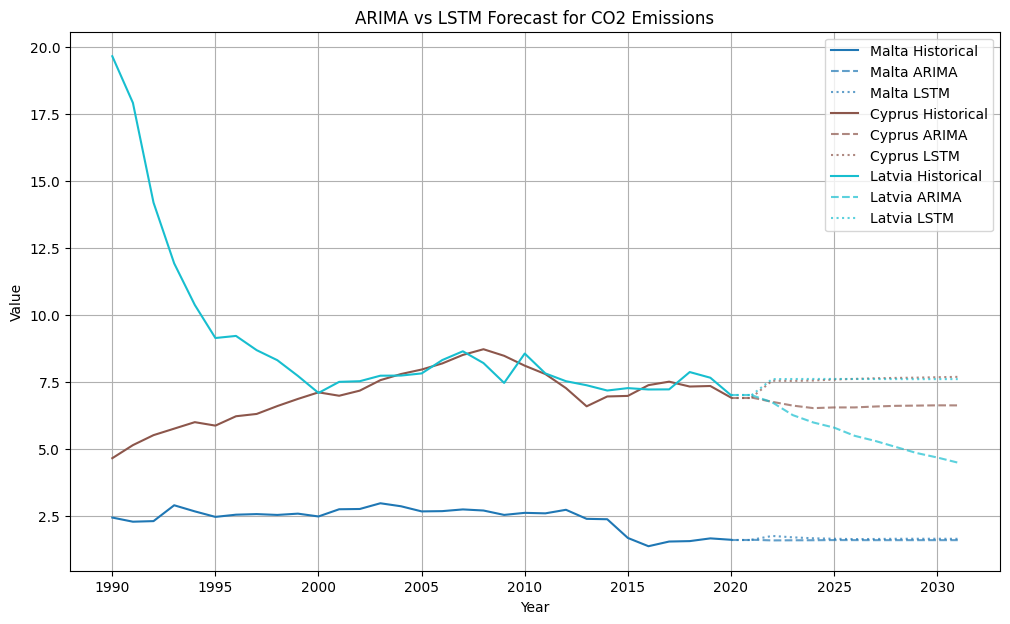

In [47]:
plot_forecast_multiple(y_true_dict, y_pred_arima_dict, y_pred_lstm_dict)

### **Step 6: Explainable AI (XAI) Model**

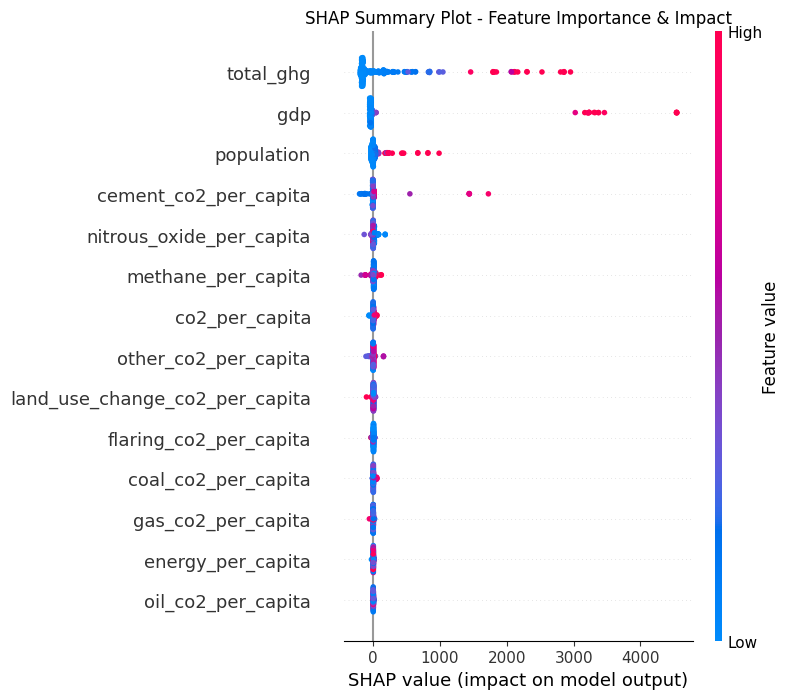

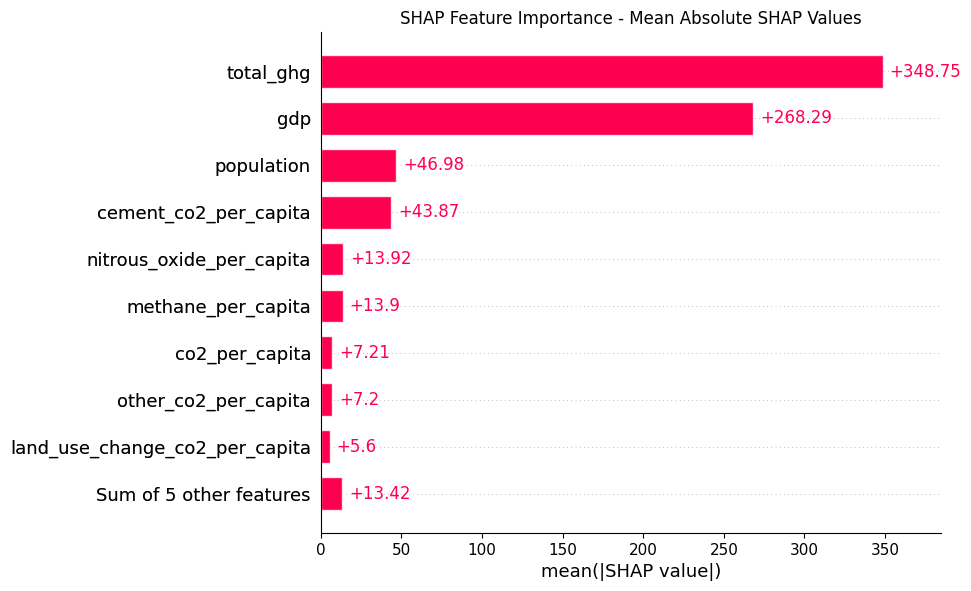

In [48]:
def xai_xgboost_shap(df, features, target, test_size=0.2, random_state=42):
    """
    Train an XGBoost model and use SHAP for explainability.

    Parameters:
    - df: DataFrame containing the dataset.
    - features: List of feature column names.
    - target: Name of the target variable.
    - test_size: Proportion of data for testing (default=0.2).
    - random_state: Random seed for reproducibility.

    Returns:
    - None (Displays SHAP summary plot & feature importance).
    """

    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)

    # Step 1: Explainability using SHAP
    explainer = shap.Explainer(xgb_model, X_train)
    shap_values = explainer(X_test)

    # Step 2: Plot SHAP summary plot
    plt.figure(figsize=(10, 6))
    plt.title('SHAP Summary Plot - Feature Importance & Impact')
    shap.summary_plot(shap_values, X_test)
    plt.show()

    # Step 3: Plot SHAP feature importance
    plt.figure(figsize=(10, 6))
    plt.title('SHAP Feature Importance - Mean Absolute SHAP Values')
    shap.plots.bar(shap_values)
    plt.show()

# Run the XAI function
xai_xgboost_shap(comparison_df, features, target)

## **`total_ghg`**

### **Step 1: Data Preparation**

In [49]:
# Load your dataset here
comparison_df = df2

# Feature Engineering: Yearly growth rate for total GHG emissions
comparison_df['ghg_growth_abs'] = comparison_df.groupby('country')['total_ghg'].diff()
comparison_df['ghg_growth_prct'] = comparison_df.groupby('country')['total_ghg'].pct_change() * 100

# Select features and target variable for 'total_ghg'
features = ['population', 'gdp', 'cement_co2_per_capita', 'co2_per_capita',
            'coal_co2_per_capita', 'energy_per_capita', 'flaring_co2_per_capita',
            'gas_co2_per_capita', 'land_use_change_co2_per_capita', 'methane_per_capita',
            'nitrous_oxide_per_capita', 'oil_co2_per_capita', 'other_co2_per_capita', 'co2']

target = 'total_ghg'

X = comparison_df[features]
y = comparison_df[target]

### **Step 2: Train-Test Split**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Step 3: ARIMA for Time-Series Forecasting**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'



ARIMA - China Evaluation
MAE: 2549.811342387412
MSE: 7741868.245044432
RMSE: 2782.4212917968466
R²: -15.447429993015124
MAPE: 0.22294017488420173

ARIMA - United States Evaluation
MAE: 223.62973508692383
MSE: 82739.32919459
RMSE: 287.64444926782437
R²: -1.391070555787857
MAPE: 0.03977942359607351

ARIMA - Russia Evaluation
MAE: 195.9714397873183
MSE: 50627.711838082854
RMSE: 225.00602622614988
R²: -3.1050432946220017
MAPE: 0.11173763969327118


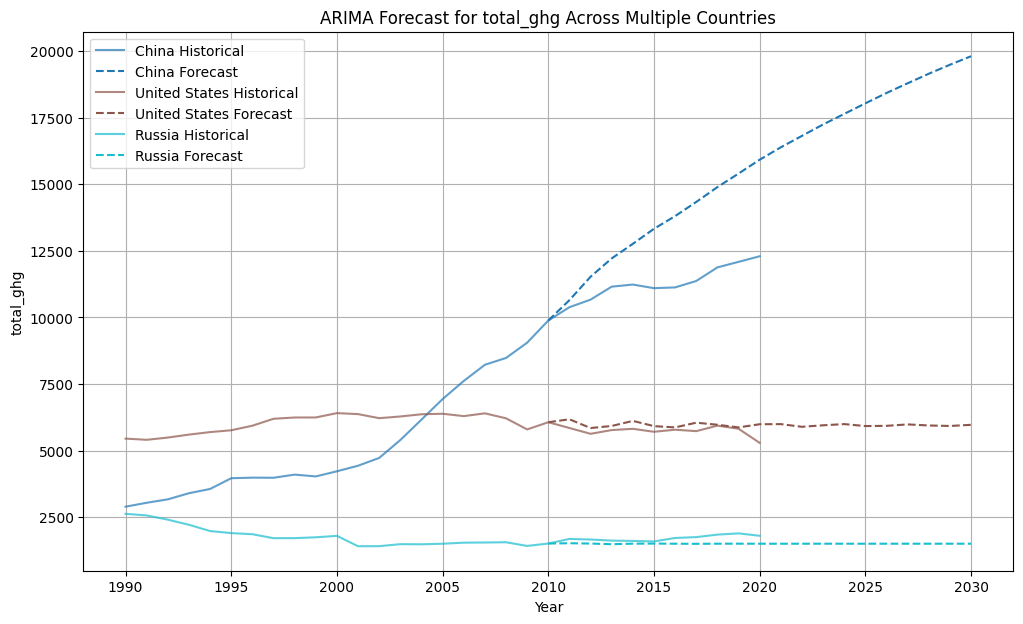

In [51]:
arima_forecast_multiple_2010(comparison_df, big_country_names, 'total_ghg')


ARIMA - Malta Evaluation
MAE: 0.5899498599760323
MSE: 0.523185339808959
RMSE: 0.7233155188498025
R²: -1.3889561238408716
MAPE: 0.27978024800575585

ARIMA - Cyprus Evaluation
MAE: 0.9877467404966986
MSE: 1.1353608336392076
RMSE: 1.0655331217935966
R²: -5.765222187384604
MAPE: 0.12323394586248489

ARIMA - Latvia Evaluation
MAE: 4.235333633752657
MSE: 20.823578161500652
RMSE: 4.563285895218559
R²: -1.4294508487583686
MAPE: 0.4245786295119226


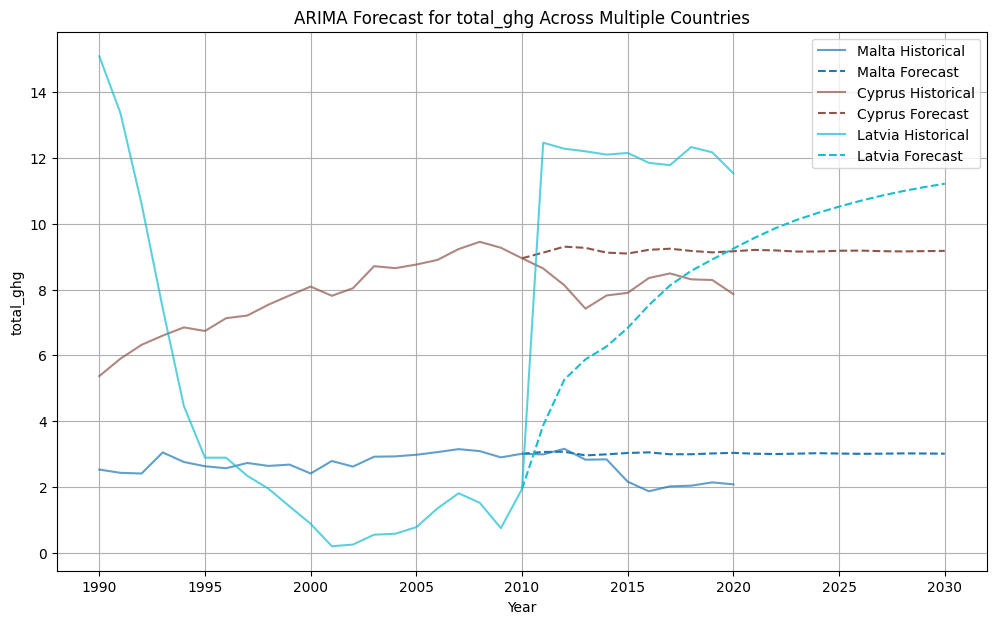

In [52]:
arima_forecast_multiple_2010(comparison_df, small_country_names, 'total_ghg')

### **Step 4: LSTM for Time-Series Forecasting**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

LSTM - China Evaluation
MAE: 4948.421132812499
MSE: 31749842.08055093
RMSE: 5634.699821689788
R²: -66.45184603773247
MAPE: 0.4297192061758532
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━

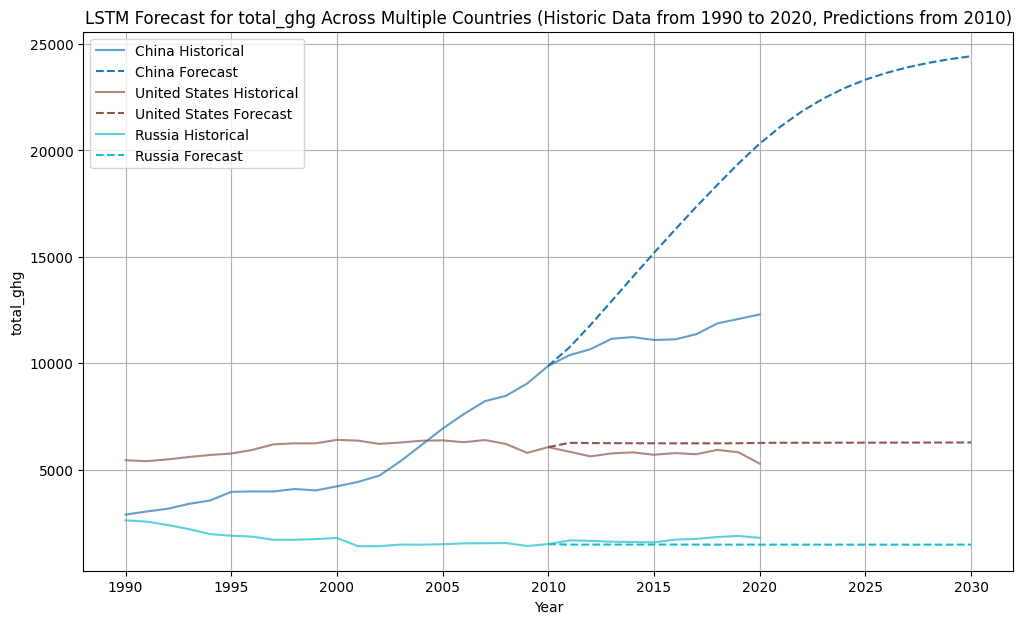

In [53]:
lstm_forecast_2010(comparison_df, big_country_names, 'total_ghg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

LSTM - Malta Evaluation
MAE: 0.7874859775196422
MSE: 0.9017722032730059
RMSE: 0.9496168718346394
R²: -3.117650215705897
MAPE: 0.3715035662543494
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━

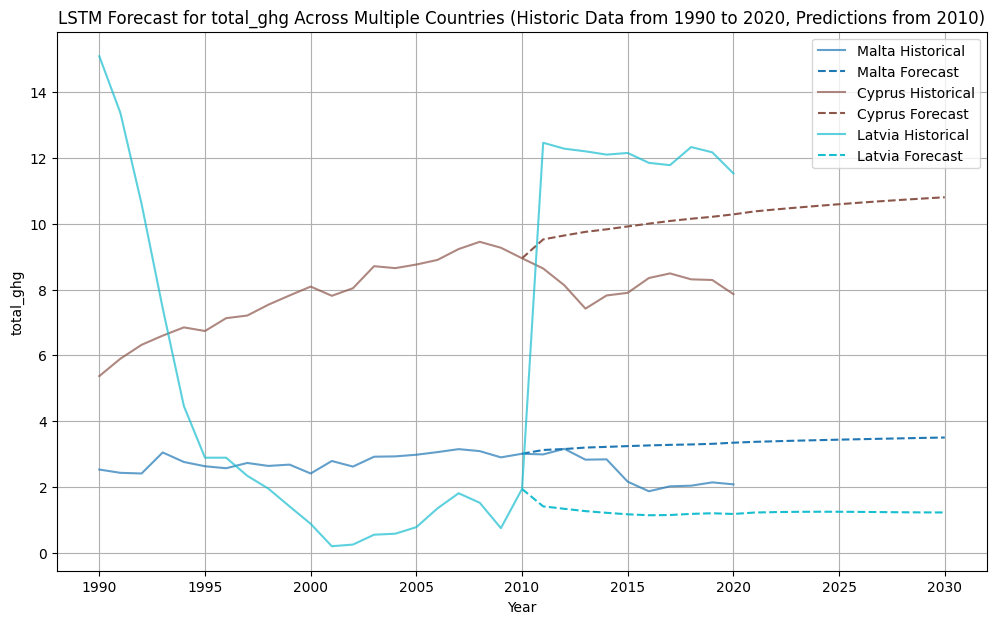

In [54]:
lstm_forecast_2010(comparison_df, small_country_names, 'total_ghg')

### **Step 5a: Comparing ARIMA and LSTM Models - big_country_names**

In [55]:
# Extract Actual Data

# Dictionary to store actual values (historical data)
y_true_dict = {}

for country in big_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['total_ghg'])  # Ensure no missing values
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)

    # Store historical CO2 values
    y_true_dict[country] = country_data['total_ghg']

In [56]:
# Generate ARIMA Forecasts

years_ahead = 10  # Forecast years

y_pred_arima_dict = {}

for country in big_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['total_ghg'])
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)
    country_data.index = country_data.index.to_period('Y').to_timestamp()

    # Explicitly set yearly frequency to avoid warnings
    #country_data = country_data.asfreq('YE')

    time_series = country_data['total_ghg']

    if len(time_series) < 2:
        print(f"Not enough data for {country}, skipping.")
        continue

    # Fit ARIMA model
    try:
        model = ARIMA(time_series, order=(5,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=years_ahead)

        # Create forecast years
        forecast_years = pd.date_range(start=country_data.index[-1], periods=years_ahead + 1, freq='YE')

        # Store forecasted values
        y_pred_arima_dict[country] = pd.Series([time_series.iloc[-1]] + forecast.tolist(), index=forecast_years)

    except Exception as e:
        print(f"ARIMA failed for {country}: {e}")
        continue

In [57]:
# Generate LSTM Forecasts

lookback = 10  # Number of past years to use for prediction
years_ahead = 10  # Forecast years

y_pred_lstm_dict = {}

for country in big_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['total_ghg'])
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)
    country_data.index = country_data.index.to_period('Y').to_timestamp()
    time_series = country_data['total_ghg'].values.reshape(-1, 1)

    if len(time_series) < lookback:
        print(f"Not enough data for {country}, skipping.")
        continue

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    time_series_scaled = scaler.fit_transform(time_series)

    # Create sequences
    X, y = [], []
    for j in range(len(time_series_scaled) - lookback):
        X.append(time_series_scaled[j:j + lookback])
        y.append(time_series_scaled[j + lookback])

    X, y = np.array(X), np.array(y)

    # Build and train LSTM model
    model = Sequential([
        Input(shape=(lookback, 1)),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=50, batch_size=16, verbose=0)

    # Forecast future values
    last_sequence = time_series_scaled[-lookback:].reshape(1, lookback, 1)
    forecast_scaled = []

    for _ in range(years_ahead):
        pred = model.predict(last_sequence)[0][0]
        forecast_scaled.append(pred)
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[0, -1, 0] = pred

    forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1)).flatten()

    # Create forecast years
    forecast_years = pd.date_range(start=country_data.index[-1], periods=years_ahead + 1, freq='YE')

    # Store forecasted values
    y_pred_lstm_dict[country] = pd.Series([time_series[-1].flatten()[0]] + forecast.tolist(), index=forecast_years)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━

In [58]:
# def plot_forecast_multiple(y_true_dict, y_pred_arima_dict, y_pred_lstm_dict, title="ARIMA vs LSTM Forecast for total_ghg Emissions"):
#     """
#     Plots historical data and ARIMA vs. LSTM forecasts for multiple countries.

#     Parameters:
#     - y_true_dict: Dictionary with country names as keys and actual values as lists/arrays.
#     - y_pred_arima_dict: Dictionary with ARIMA forecasts.
#     - y_pred_lstm_dict: Dictionary with LSTM forecasts.
#     """
#     plt.figure(figsize=(12, 7))
#     colors = plt.get_cmap('tab10', len(y_true_dict))

#     for i, country in enumerate(y_true_dict.keys()):
#         y_true = y_true_dict[country]
#         y_pred_arima = y_pred_arima_dict.get(country, None)
#         y_pred_lstm = y_pred_lstm_dict.get(country, None)

#         # Assign color
#         color = colors(i)

#         # Plot actual data
#         plt.plot(y_true.index, y_true, linestyle='solid', color=color, label=f'{country} Historical')

#         # Plot ARIMA forecast
#         if y_pred_arima is not None:
#             # Align ARIMA forecast to start from 2020 (or the appropriate forecast start year)
#             forecast_start_index = y_pred_arima.index[0]
#             historical_end_index = y_true.index[-1]

#             if forecast_start_index != historical_end_index:
#                 # Extend historical data to meet the forecast
#                 plt.plot([historical_end_index, forecast_start_index], [y_true.iloc[-1], y_pred_arima.iloc[0]], linestyle='dashed', color=color, alpha=0.7)

#             # Plot the ARIMA forecast
#             plt.plot(y_pred_arima.index, y_pred_arima, linestyle='dashed', color=color, alpha=0.7, label=f'{country} ARIMA')

#         # Plot LSTM forecast
#         if y_pred_lstm is not None:
#             # Align LSTM forecast to start from 2020 (or the appropriate forecast start year)
#             forecast_start_index = y_pred_lstm.index[0]
#             historical_end_index = y_true.index[-1]

#             # Manually set the LSTM forecast to start from 2020 if necessary
#             if forecast_start_index.year > 2020:
#                 # Adjust the index to start at 2020, or create a new DataFrame from the historical data onward
#                 new_index = pd.date_range(start='2020-01-01', periods=len(y_pred_lstm), freq='A')
#                 y_pred_lstm.index = new_index

#             if forecast_start_index != historical_end_index:
#                 # Make sure the forecast is aligned to the historical data
#                 if forecast_start_index.year > historical_end_index.year:
#                     forecast_start_index = historical_end_index
#                 # Extend historical data to meet the forecast
#                 plt.plot([historical_end_index, forecast_start_index], [y_true.iloc[-1], y_pred_lstm.iloc[0]], linestyle='dotted', color=color, alpha=0.7)

#             # Plot the LSTM forecast
#             plt.plot(y_pred_lstm.index, y_pred_lstm, linestyle='dotted', color=color, alpha=0.7, label=f'{country} LSTM')

#     plt.title(title)
#     plt.xlabel("Year")
#     plt.ylabel("Value")
#     plt.legend()
#     plt.grid()
#     plt.show()

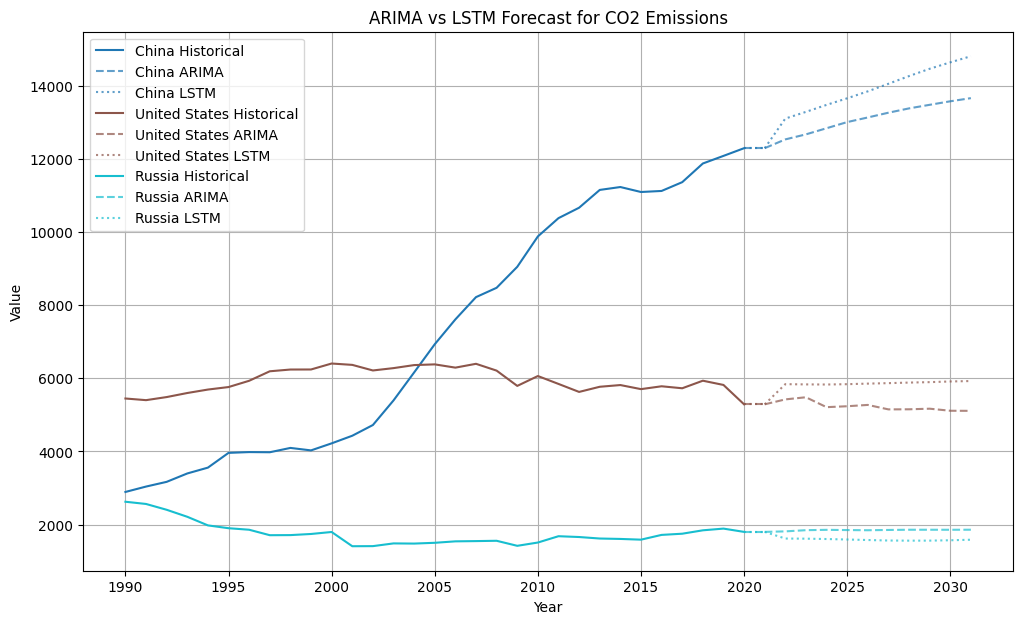

In [59]:
plot_forecast_multiple(y_true_dict, y_pred_arima_dict, y_pred_lstm_dict)

### **Step 5b: Comparing ARIMA and LSTM Models - small_country_names**

In [60]:
# Extract Actual Data

# Dictionary to store actual values (historical data)
y_true_dict = {}

for country in small_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['total_ghg'])  # Ensure no missing values
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)

    # Store historical CO2 values
    y_true_dict[country] = country_data['total_ghg']

In [61]:
# Generate ARIMA Forecasts

years_ahead = 10  # Forecast years

y_pred_arima_dict = {}

for country in small_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['total_ghg'])
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)
    country_data.index = country_data.index.to_period('Y').to_timestamp()

    # Explicitly set yearly frequency to avoid warnings
    #country_data = country_data.asfreq('YE')

    time_series = country_data['total_ghg']

    if len(time_series) < 2:
        print(f"Not enough data for {country}, skipping.")
        continue

    # Fit ARIMA model
    try:
        model = ARIMA(time_series, order=(5,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=years_ahead)

        # Create forecast years
        forecast_years = pd.date_range(start=country_data.index[-1], periods=years_ahead + 1, freq='YE')

        # Store forecasted values
        y_pred_arima_dict[country] = pd.Series([time_series.iloc[-1]] + forecast.tolist(), index=forecast_years)

    except Exception as e:
        print(f"ARIMA failed for {country}: {e}")
        continue

In [62]:
# Generate LSTM Forecasts

lookback = 10  # Number of past years to use for prediction
years_ahead = 10  # Forecast years

y_pred_lstm_dict = {}

for country in small_country_names:
    country_data = comparison_df[comparison_df['country'] == country].sort_values(by='year')
    country_data = country_data.dropna(subset=['total_ghg'])
    country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')
    country_data.set_index('year', inplace=True)
    country_data.index = country_data.index.to_period('Y').to_timestamp()
    time_series = country_data['total_ghg'].values.reshape(-1, 1)

    if len(time_series) < lookback:
        print(f"Not enough data for {country}, skipping.")
        continue

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    time_series_scaled = scaler.fit_transform(time_series)

    # Create sequences
    X, y = [], []
    for j in range(len(time_series_scaled) - lookback):
        X.append(time_series_scaled[j:j + lookback])
        y.append(time_series_scaled[j + lookback])

    X, y = np.array(X), np.array(y)

    # Build and train LSTM model
    model = Sequential([
        Input(shape=(lookback, 1)),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=50, batch_size=16, verbose=0)

    # Forecast future values
    last_sequence = time_series_scaled[-lookback:].reshape(1, lookback, 1)
    forecast_scaled = []

    for _ in range(years_ahead):
        pred = model.predict(last_sequence)[0][0]
        forecast_scaled.append(pred)
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[0, -1, 0] = pred

    forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1)).flatten()

    # Create forecast years
    forecast_years = pd.date_range(start=country_data.index[-1], periods=years_ahead + 1, freq='YE')

    # Store forecasted values
    y_pred_lstm_dict[country] = pd.Series([time_series[-1].flatten()[0]] + forecast.tolist(), index=forecast_years)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━

In [63]:
# def plot_forecast_multiple(y_true_dict, y_pred_arima_dict, y_pred_lstm_dict, title="ARIMA vs LSTM Forecast for total_ghg Emissions"):
#     """
#     Plots historical data and ARIMA vs. LSTM forecasts for multiple countries.

#     Parameters:
#     - y_true_dict: Dictionary with country names as keys and actual values as lists/arrays.
#     - y_pred_arima_dict: Dictionary with ARIMA forecasts.
#     - y_pred_lstm_dict: Dictionary with LSTM forecasts.
#     """
#     plt.figure(figsize=(12, 7))
#     colors = plt.get_cmap('tab10', len(y_true_dict))

#     for i, country in enumerate(y_true_dict.keys()):
#         y_true = y_true_dict[country]
#         y_pred_arima = y_pred_arima_dict.get(country, None)
#         y_pred_lstm = y_pred_lstm_dict.get(country, None)

#         # Assign color
#         color = colors(i)

#         # Plot actual data
#         plt.plot(y_true.index, y_true, linestyle='solid', color=color, label=f'{country} Historical')

#         # Plot ARIMA forecast
#         if y_pred_arima is not None:
#             # Align ARIMA forecast to start from 2020 (or the appropriate forecast start year)
#             forecast_start_index = y_pred_arima.index[0]
#             historical_end_index = y_true.index[-1]

#             if forecast_start_index != historical_end_index:
#                 # Extend historical data to meet the forecast
#                 plt.plot([historical_end_index, forecast_start_index], [y_true.iloc[-1], y_pred_arima.iloc[0]], linestyle='dashed', color=color, alpha=0.7)

#             # Plot the ARIMA forecast
#             plt.plot(y_pred_arima.index, y_pred_arima, linestyle='dashed', color=color, alpha=0.7, label=f'{country} ARIMA')

#         # Plot LSTM forecast
#         if y_pred_lstm is not None:
#             # Align LSTM forecast to start from 2020 (or the appropriate forecast start year)
#             forecast_start_index = y_pred_lstm.index[0]
#             historical_end_index = y_true.index[-1]

#             # Manually set the LSTM forecast to start from 2020 if necessary
#             if forecast_start_index.year > 2020:
#                 # Adjust the index to start at 2020, or create a new DataFrame from the historical data onward
#                 new_index = pd.date_range(start='2020-01-01', periods=len(y_pred_lstm), freq='A')
#                 y_pred_lstm.index = new_index

#             if forecast_start_index != historical_end_index:
#                 # Make sure the forecast is aligned to the historical data
#                 if forecast_start_index.year > historical_end_index.year:
#                     forecast_start_index = historical_end_index
#                 # Extend historical data to meet the forecast
#                 plt.plot([historical_end_index, forecast_start_index], [y_true.iloc[-1], y_pred_lstm.iloc[0]], linestyle='dotted', color=color, alpha=0.7)

#             # Plot the LSTM forecast
#             plt.plot(y_pred_lstm.index, y_pred_lstm, linestyle='dotted', color=color, alpha=0.7, label=f'{country} LSTM')

#     plt.title(title)
#     plt.xlabel("Year")
#     plt.ylabel("Value")
#     plt.legend()
#     plt.grid()
#     plt.show()

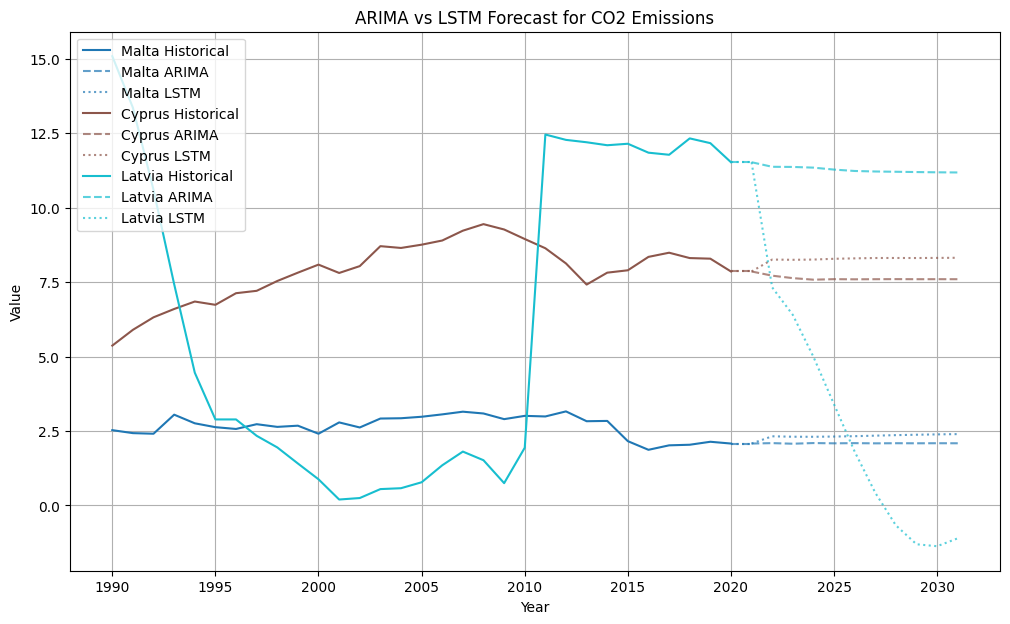

In [64]:
plot_forecast_multiple(y_true_dict, y_pred_arima_dict, y_pred_lstm_dict)

**TO_DO:** Split ARIMA and LSTM models into higher and lower countries for `total_ghg`

### **Step 6: Explainable AI (XAI) Model**

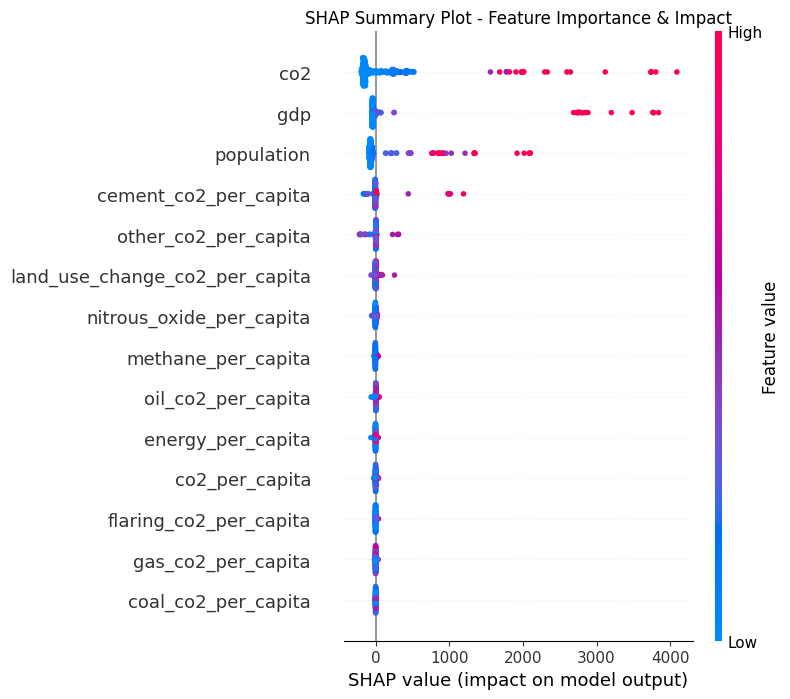

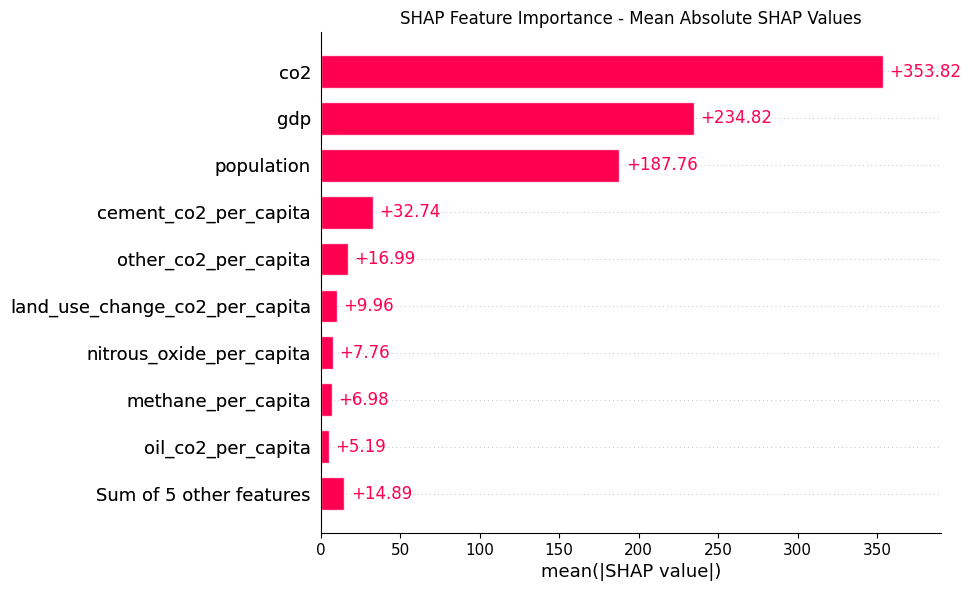

In [65]:
xai_xgboost_shap(comparison_df, features, target)